In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load MNIST data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Convert labels to integers
X = np.array(X).astype(np.float32)
X = X/255.0
y = np.array(y).astype(np.uint8).reshape(-1, 1)
# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
print(y_one_hot.shape)
print(X.shape)

(70000, 10)
(70000, 784)


In [4]:
# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.4, random_state=42)

# Split the temporary set equally into testing and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Epoch 1/10 - loss: 0.4744 - val_loss: 0.3007
Epoch 2/10 - loss: 0.2297 - val_loss: 0.1757
Epoch 3/10 - loss: 0.1442 - val_loss: 0.1213
Epoch 4/10 - loss: 0.1056 - val_loss: 0.0948
Epoch 5/10 - loss: 0.0855 - val_loss: 0.0799
Epoch 6/10 - loss: 0.0734 - val_loss: 0.0704
Epoch 7/10 - loss: 0.0653 - val_loss: 0.0636
Epoch 8/10 - loss: 0.0593 - val_loss: 0.0587
Epoch 9/10 - loss: 0.0547 - val_loss: 0.0548
Epoch 10/10 - loss: 0.0511 - val_loss: 0.0518


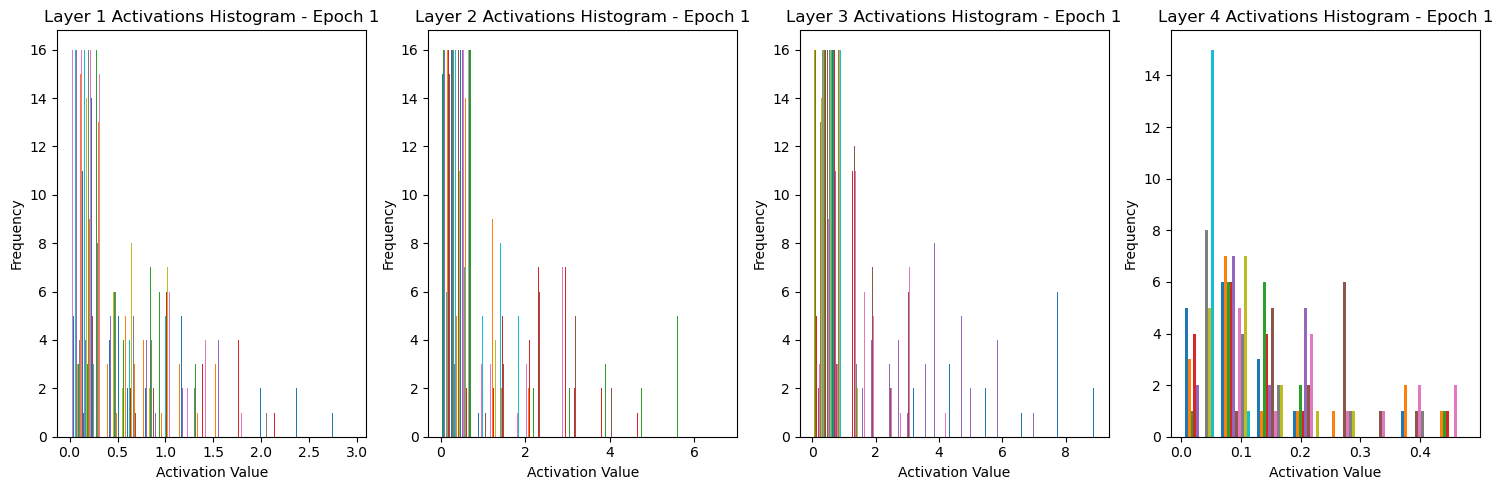

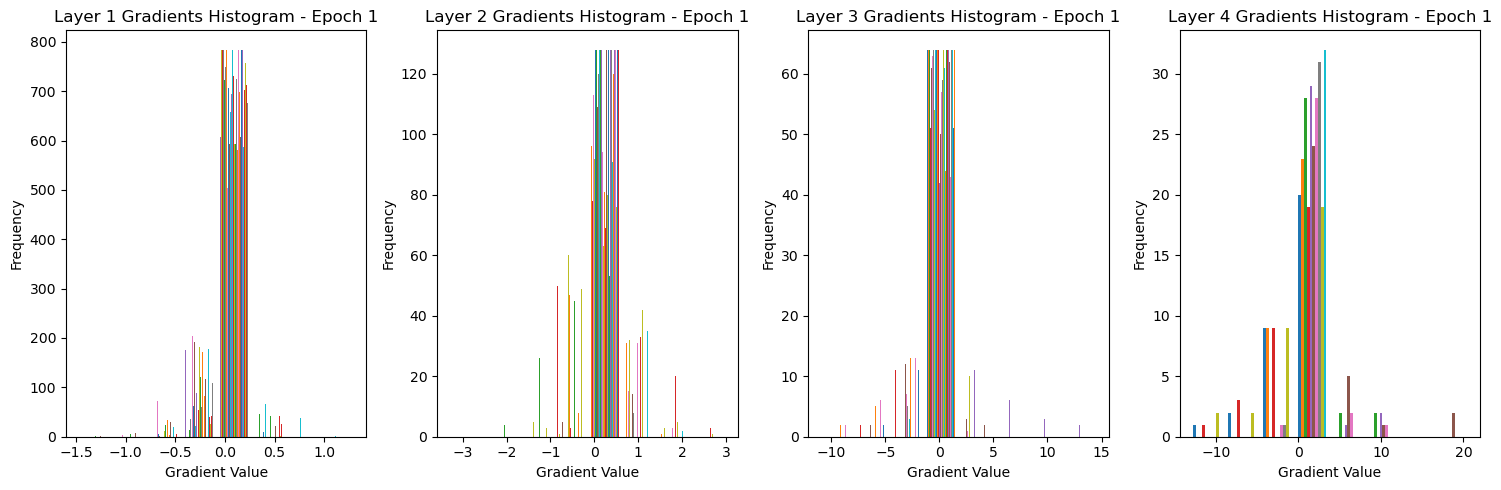

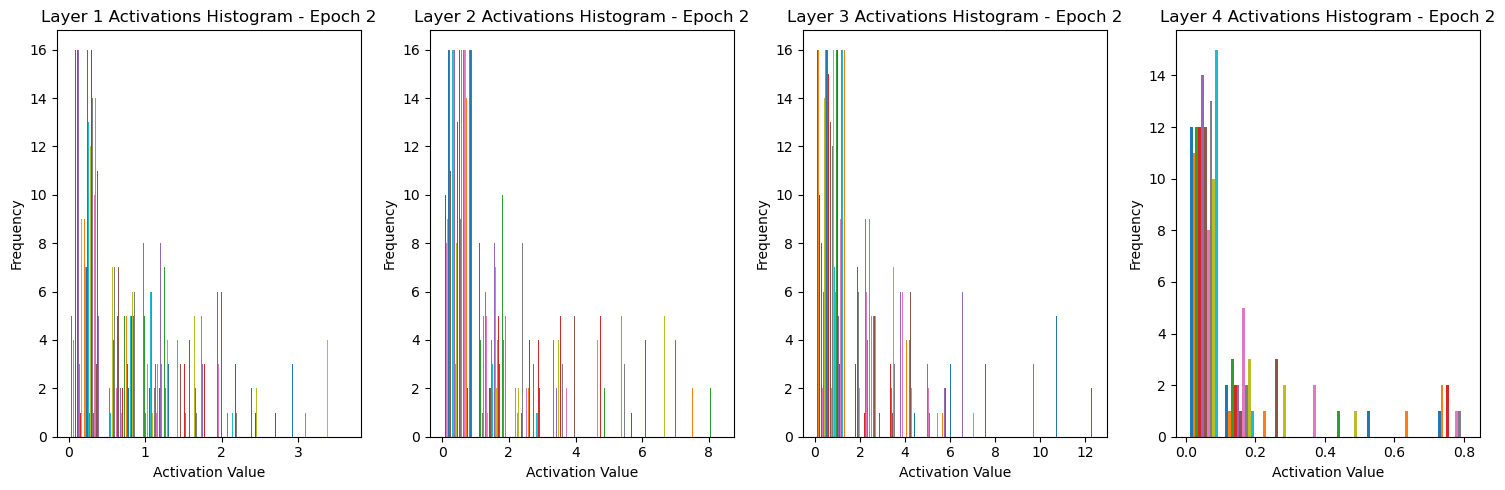

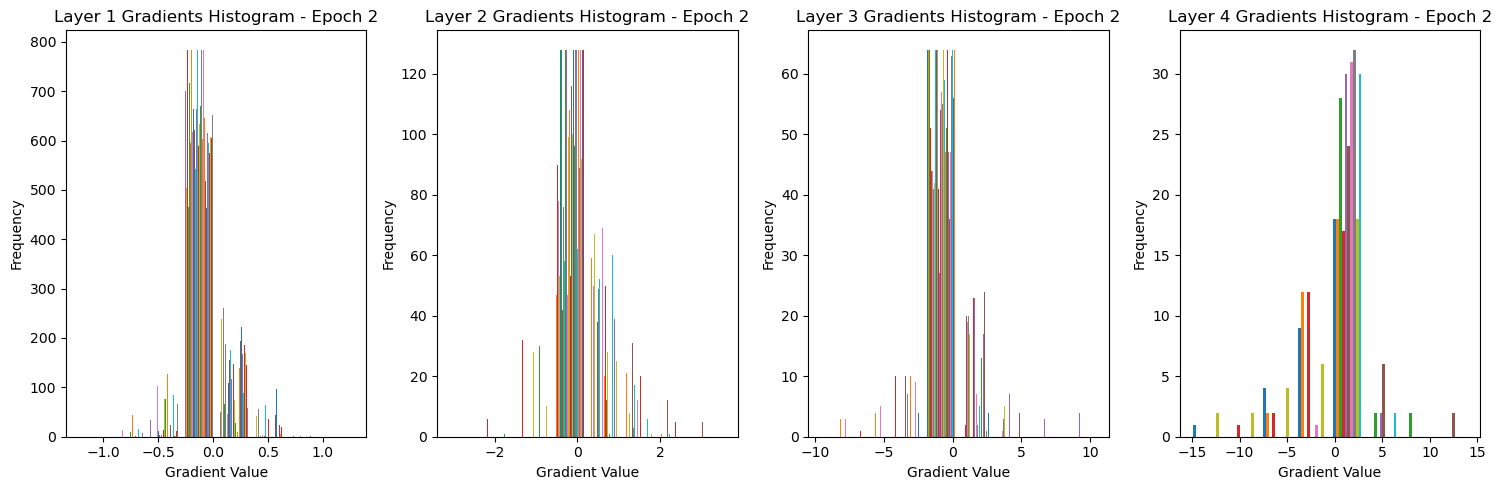

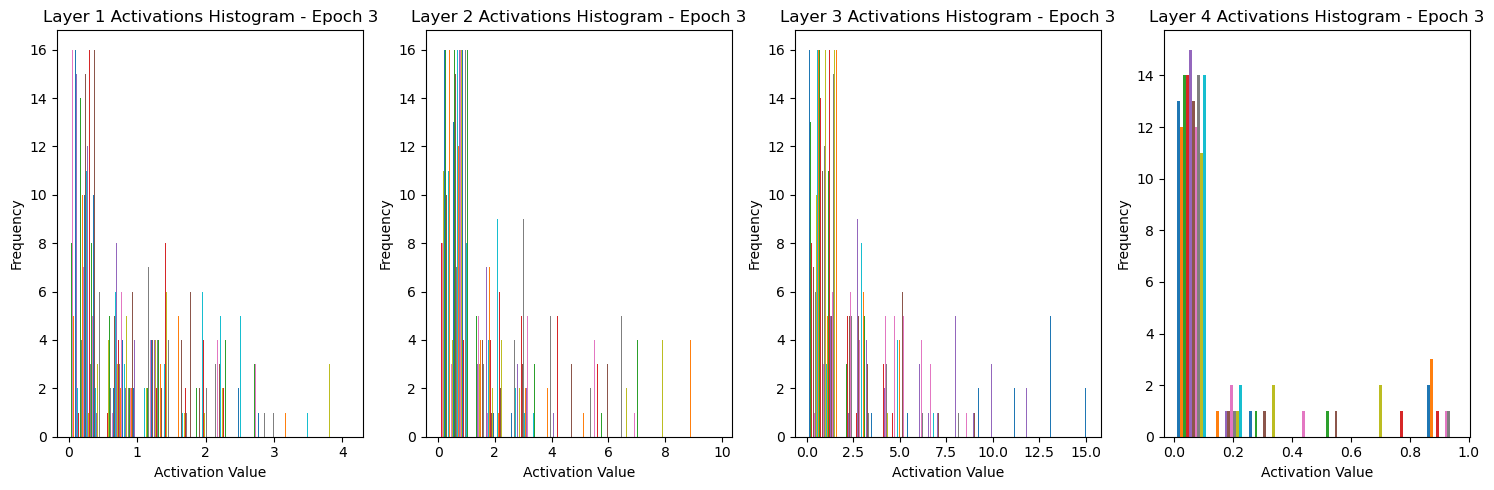

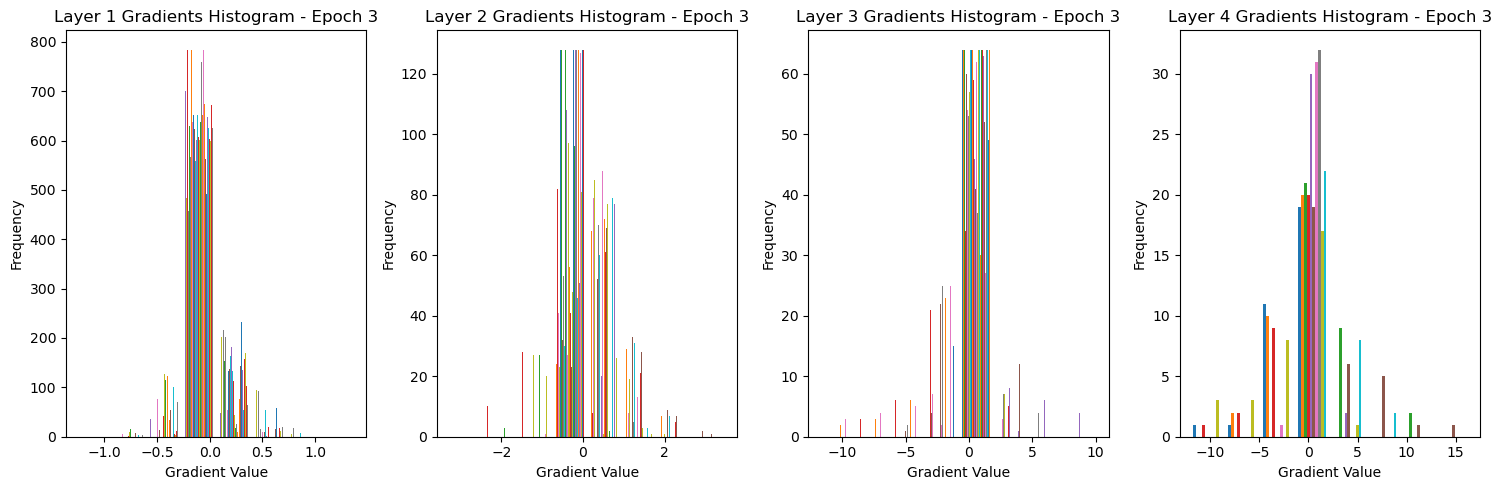

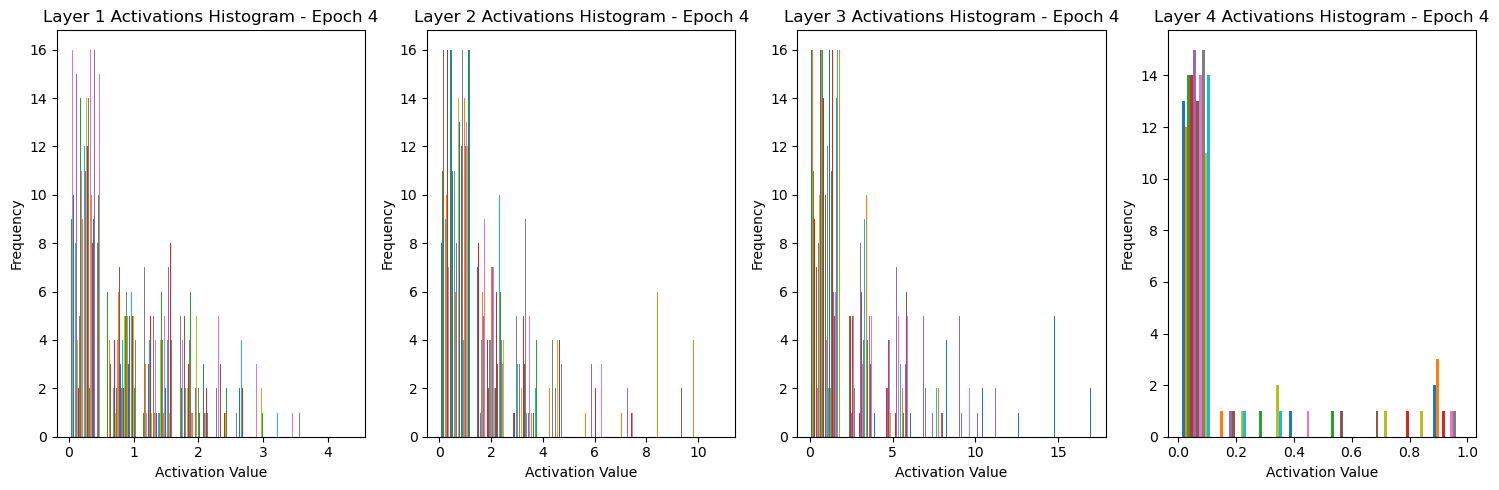

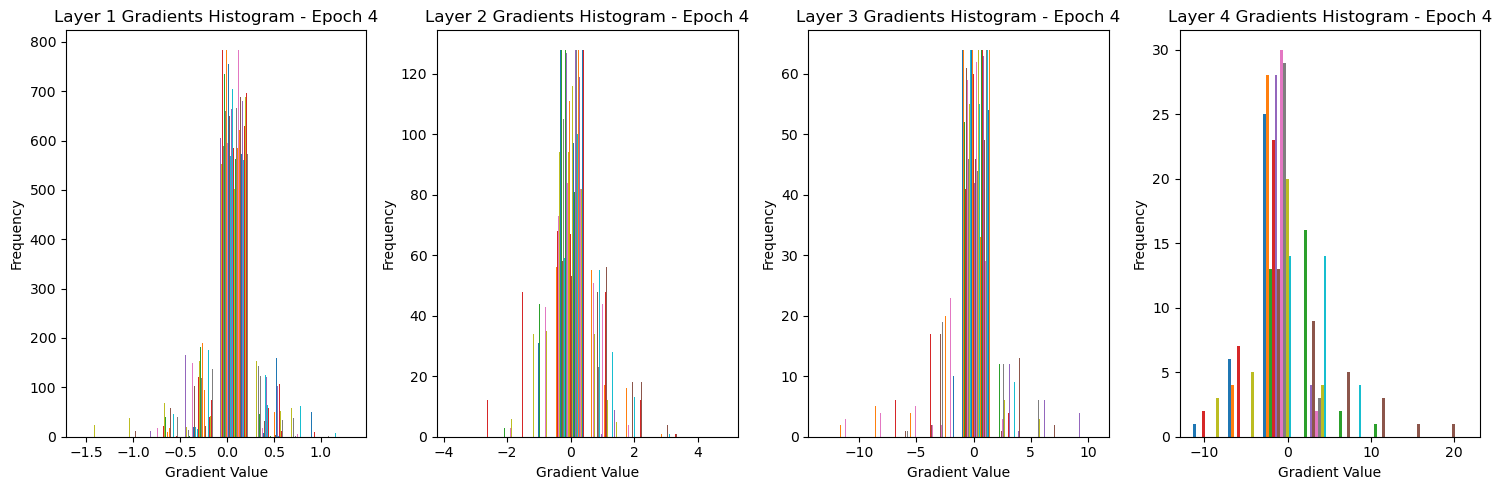

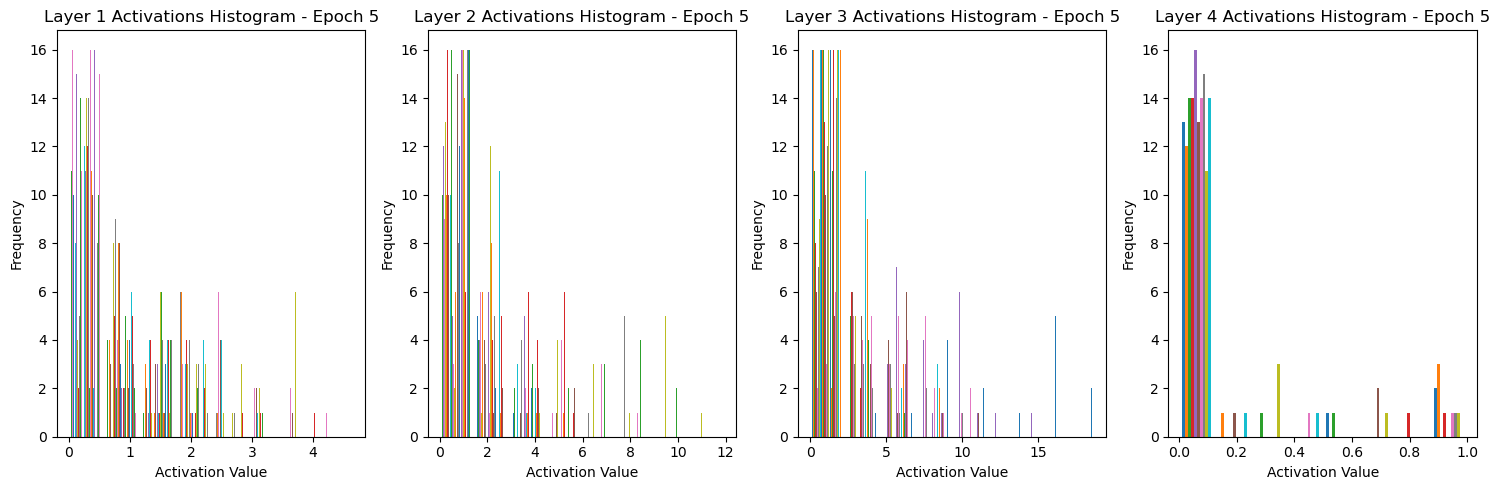

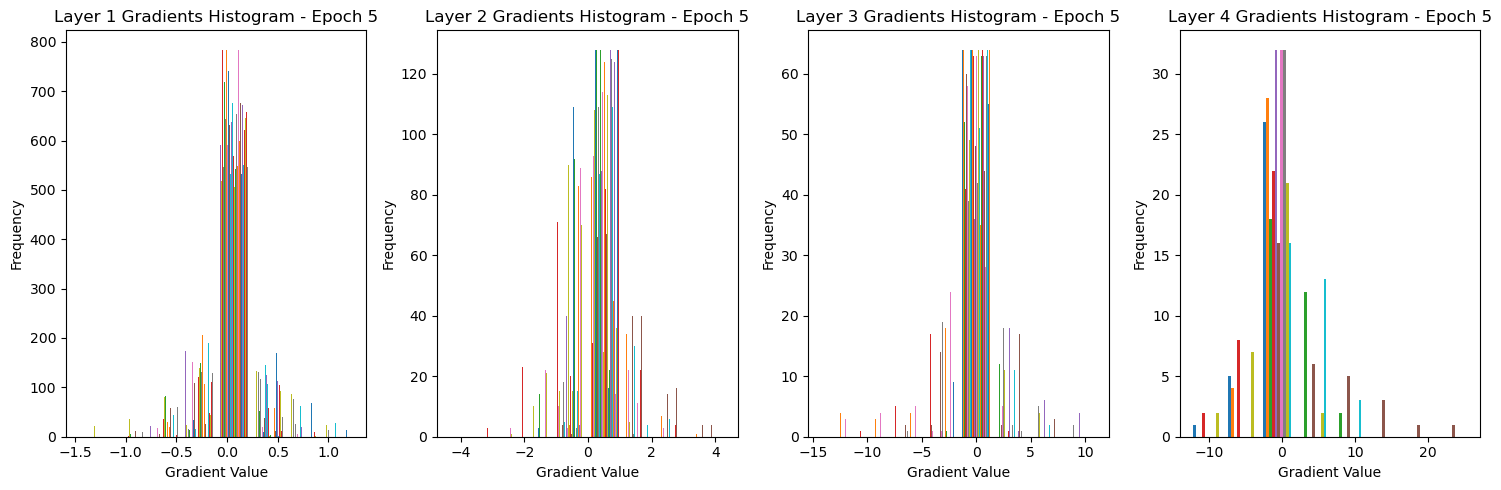

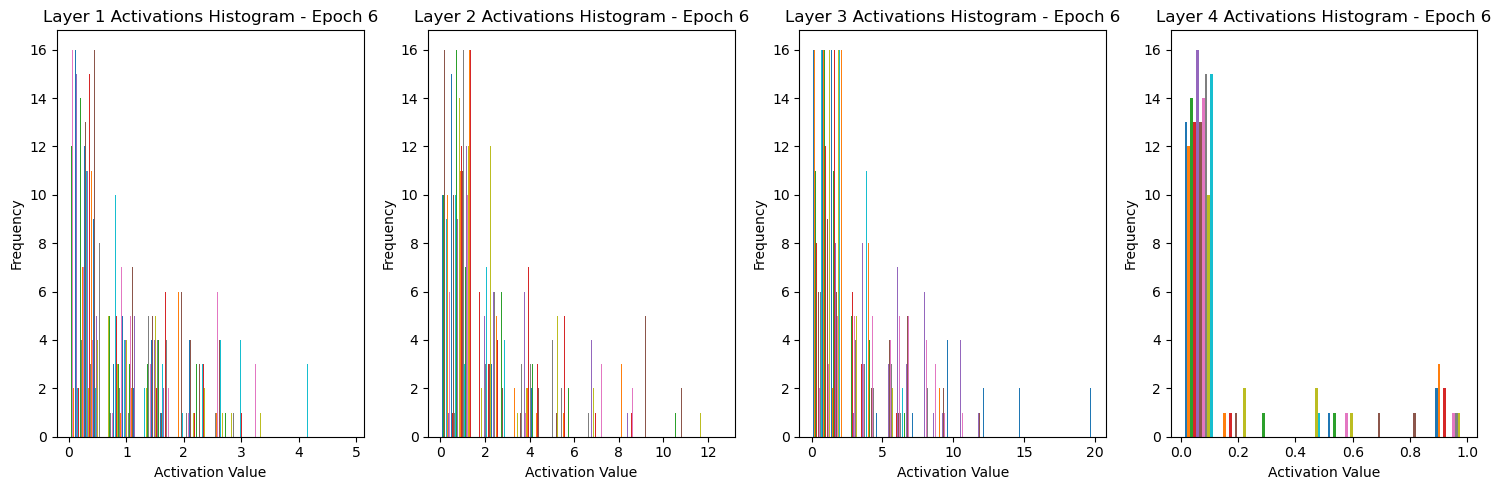

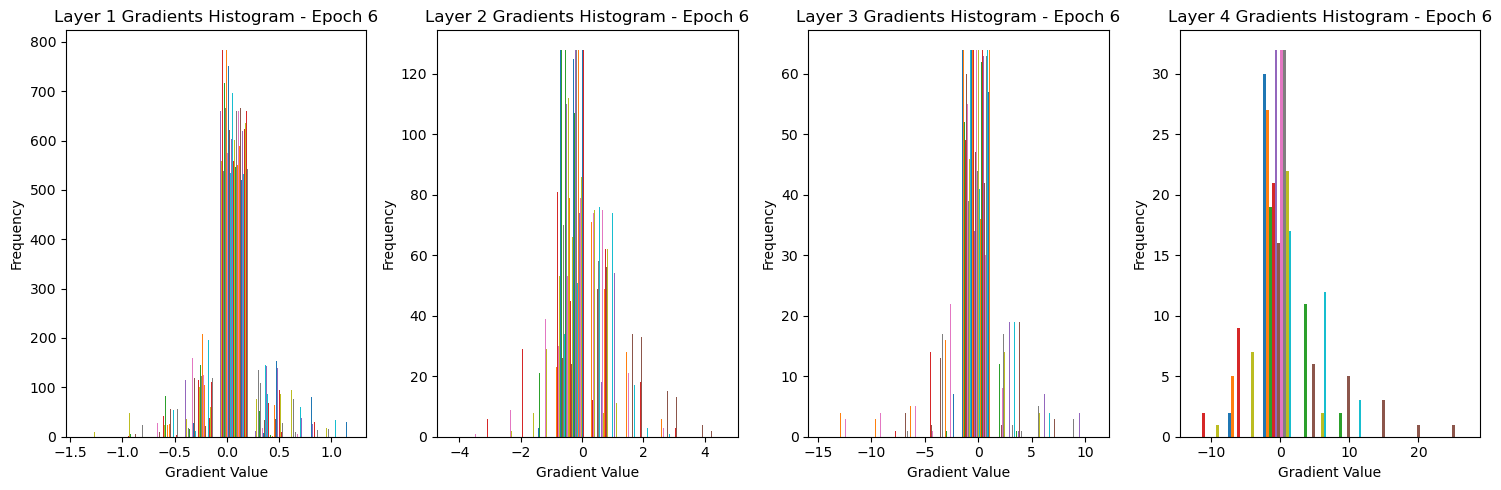

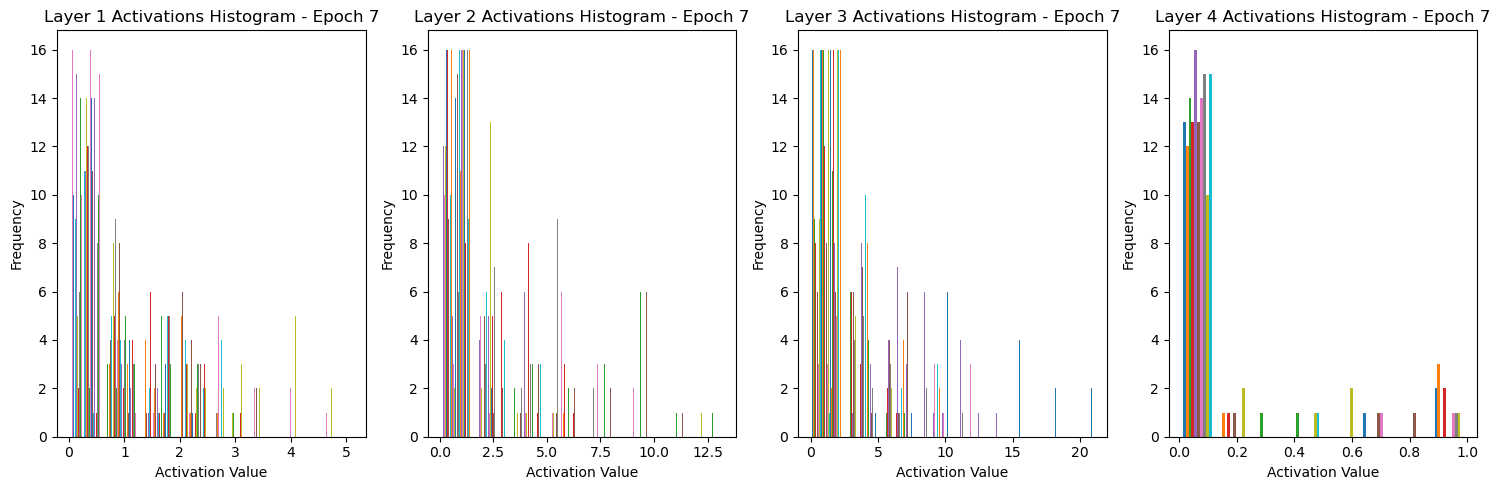

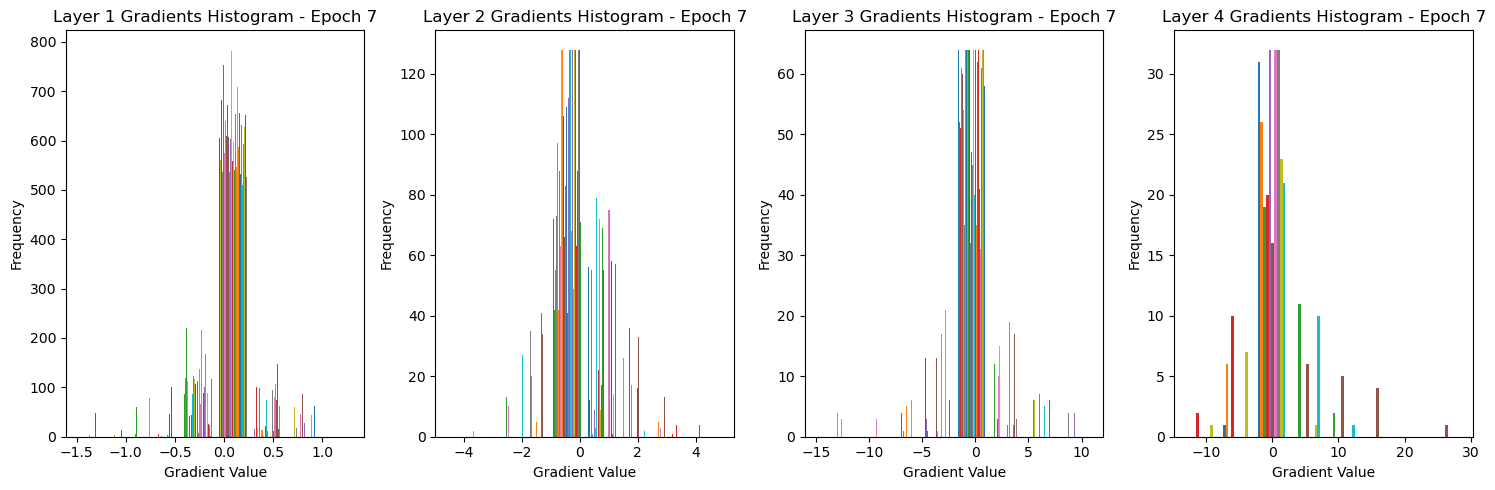

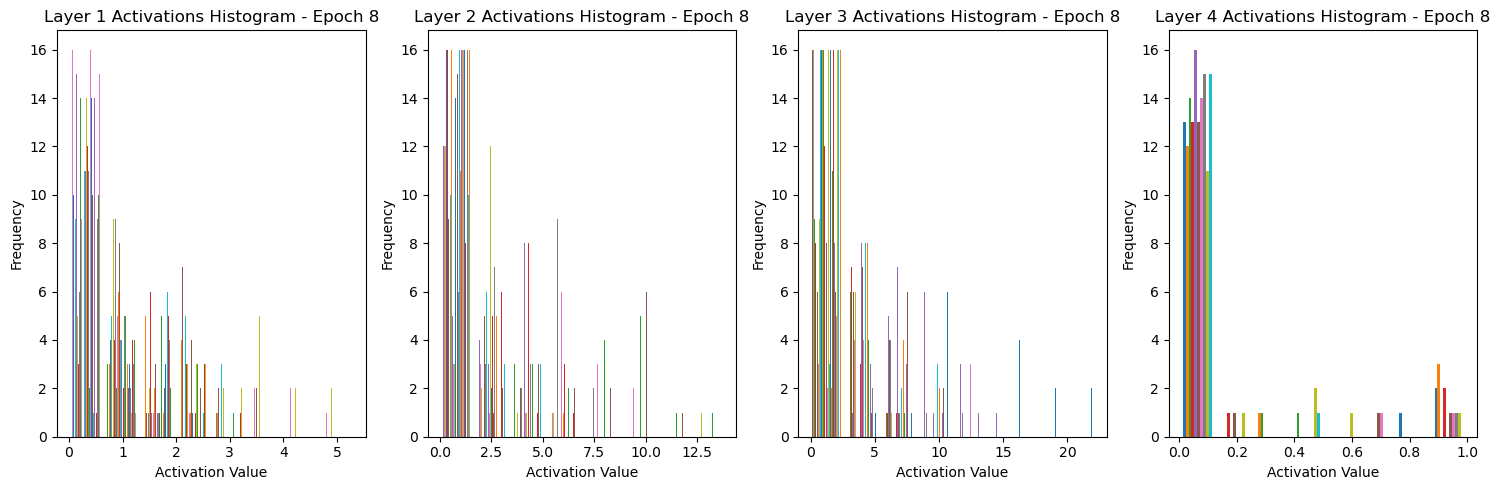

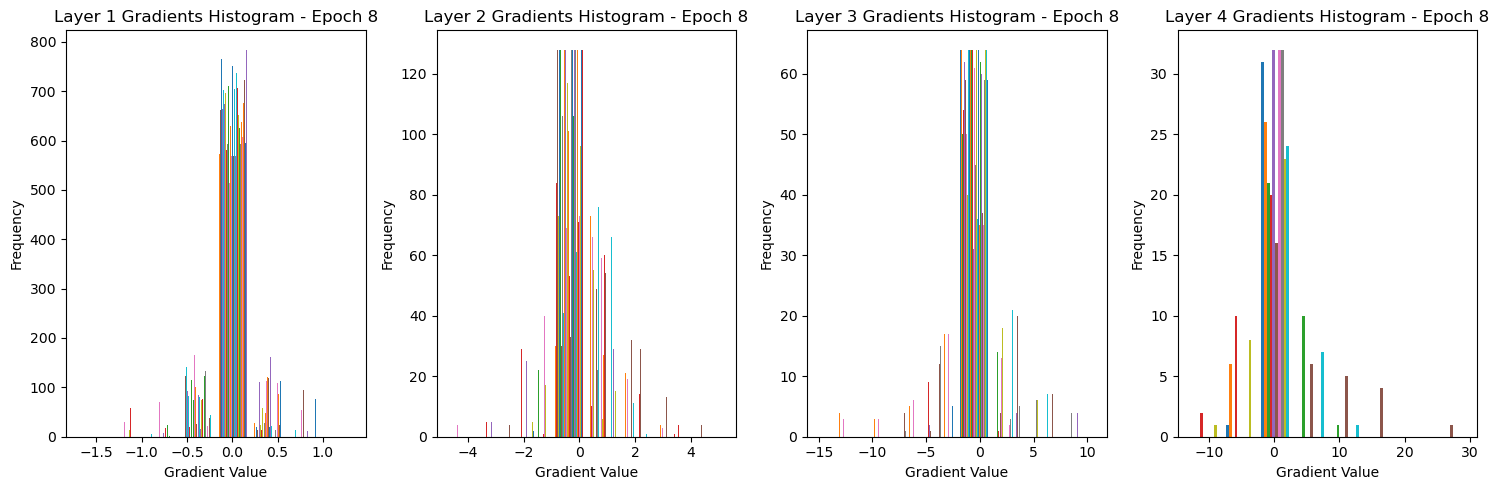

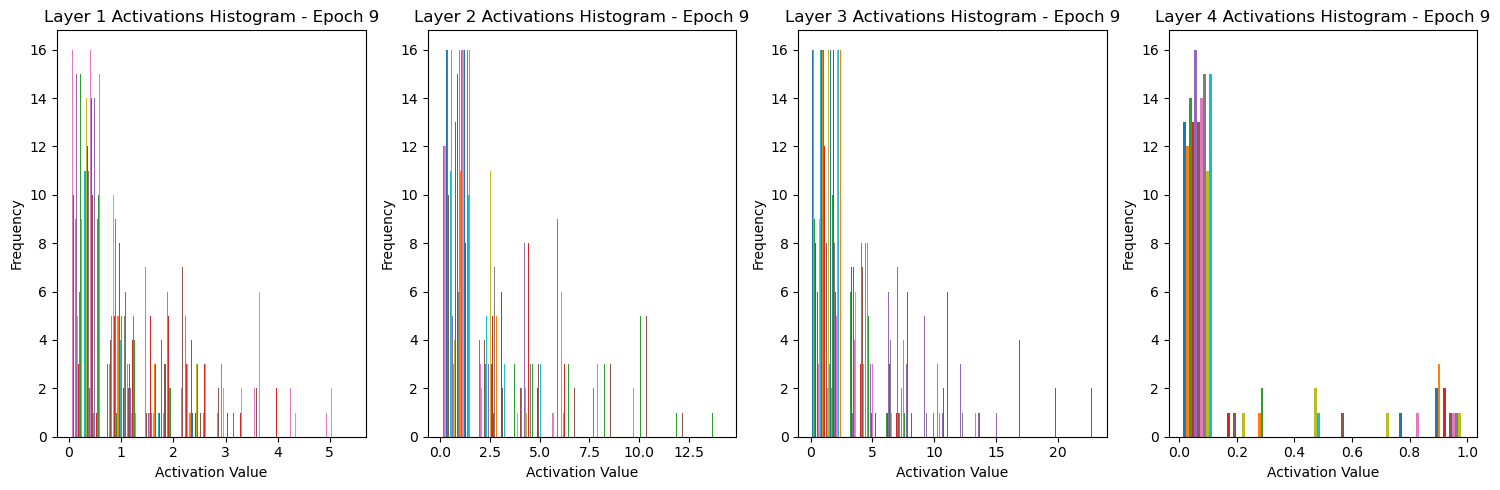

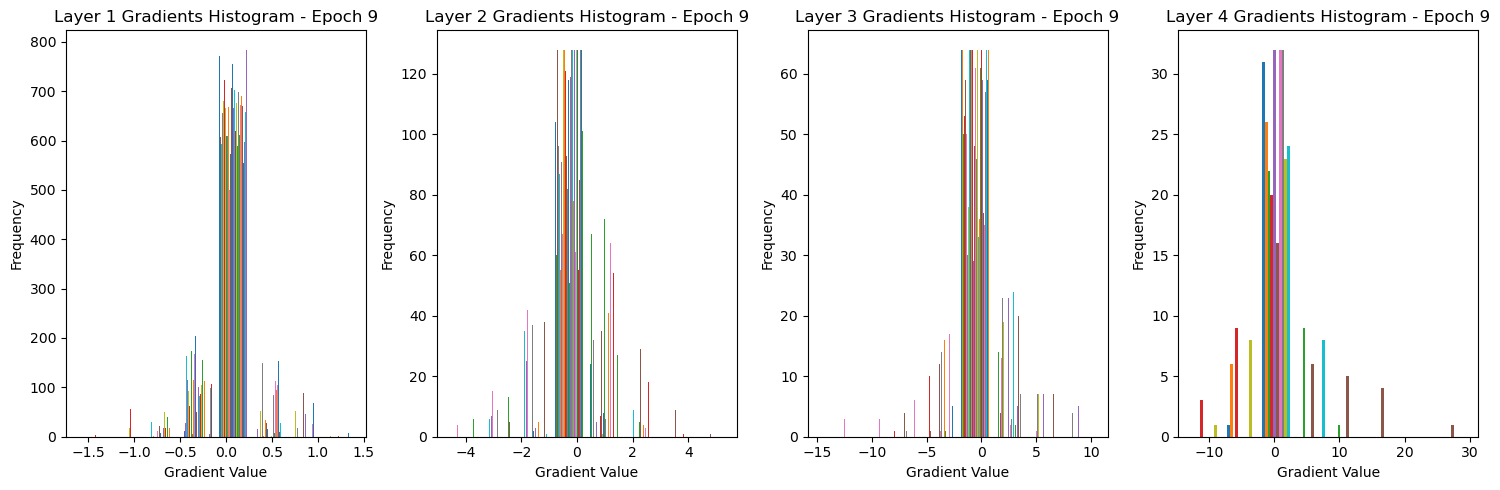

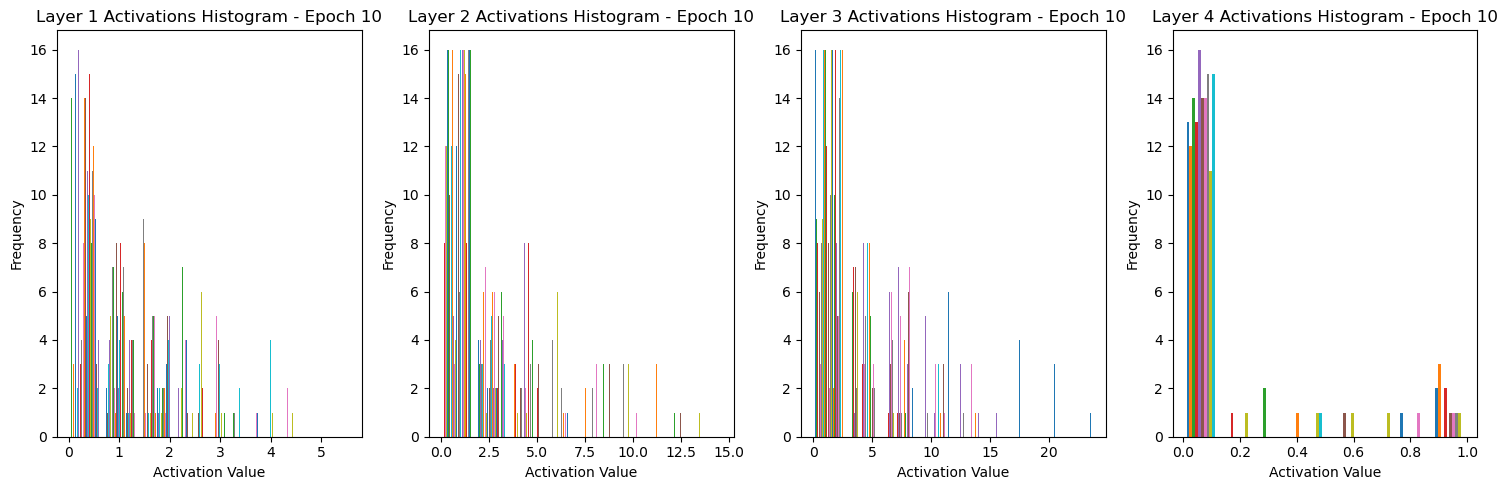

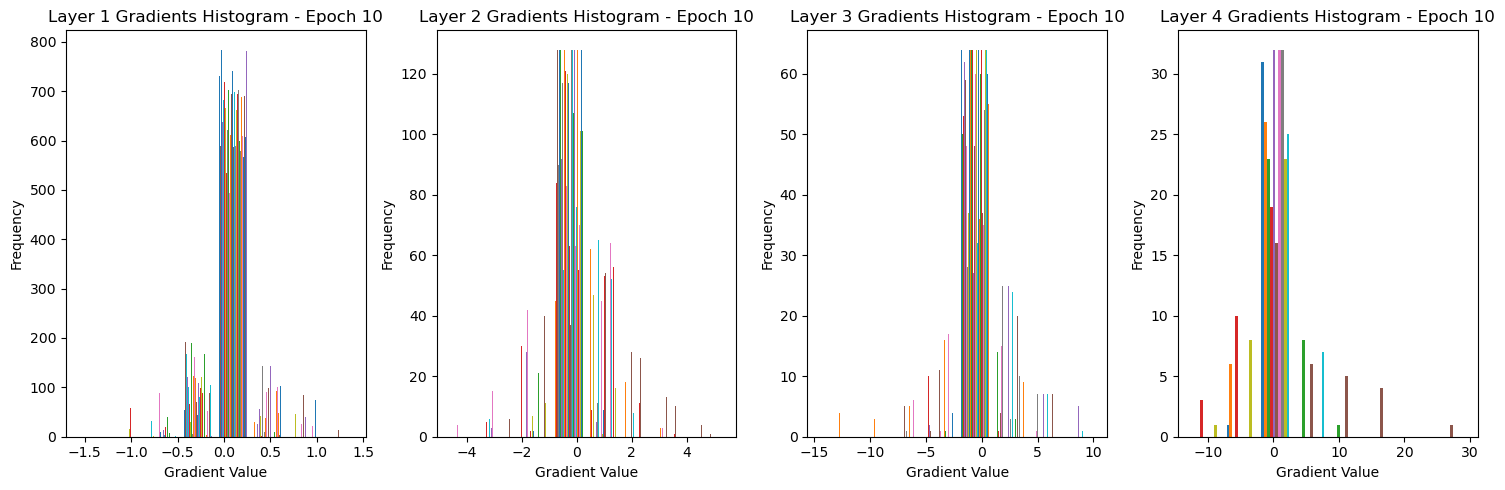

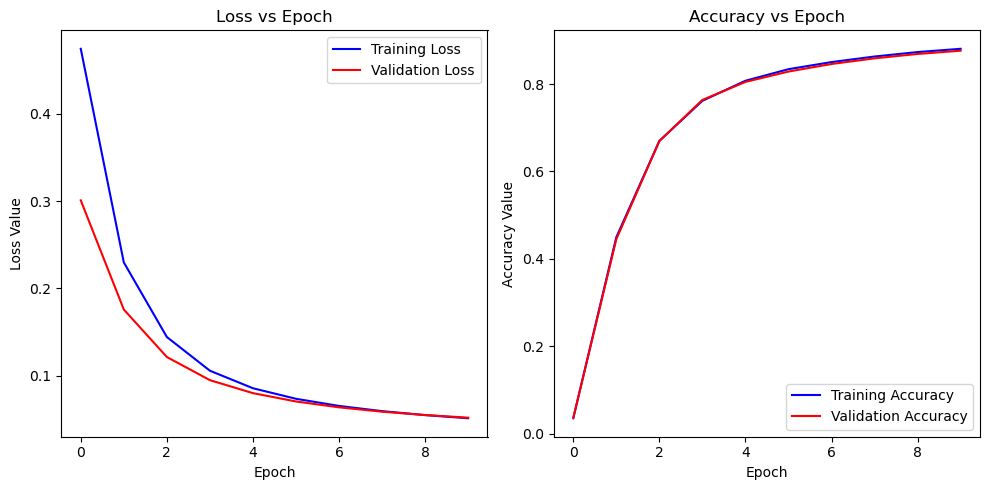

In [5]:
from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=LeakyReLu()))
model.add(Dense(n_units= 64, input_dim=128, activation=LeakyReLu()))
model.add(Dense(n_units= 32, input_dim=64, activation=LeakyReLu()))
model.add(Dense(n_units = 10, input_dim = 32, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001),
              loss=BinaryCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train, epochs=10, batch_size=512, X_val=X_test, y_val=y_test, verbose=True)


In [6]:
model.export_net('models/mnist_model.joblib')

In [7]:
from nnlib.models.sequential import SequentialModel
model = SequentialModel.import_net('models/mnist_model.joblib')

In [8]:
predictions = model.predict(X_val)


In [9]:
pred_numbers=[]
for i in predictions:
    # print(i)
    pred_numbers.append(np.argmax(i))

In [10]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_val, axis=1), pred_numbers))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1419
           1       0.95      0.98      0.97      1607
           2       0.93      0.91      0.92      1403
           3       0.92      0.90      0.91      1437
           4       0.93      0.94      0.93      1326
           5       0.92      0.89      0.90      1249
           6       0.93      0.95      0.94      1351
           7       0.95      0.93      0.94      1488
           8       0.90      0.89      0.89      1319
           9       0.91      0.92      0.91      1401

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



In [11]:
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)
X_train = X_train/255.0
X_test = X_test/255.0

In [13]:
# One-hot encode the target labels
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Split the data into training (60%) and temporary (40%) sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test_onehot, test_size=0.5, random_state=42)

c:\Users\vitor\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
y_train.shape

(60000,)

Epoch 1/10 - loss: 0.3851 - val_loss: 0.2306
Epoch 2/10 - loss: 0.1827 - val_loss: 0.1479
Epoch 3/10 - loss: 0.1305 - val_loss: 0.1217
Epoch 4/10 - loss: 0.1122 - val_loss: 0.1100
Epoch 5/10 - loss: 0.1025 - val_loss: 0.1029
Epoch 6/10 - loss: 0.0962 - val_loss: 0.0982
Epoch 7/10 - loss: 0.0918 - val_loss: 0.0948
Epoch 8/10 - loss: 0.0885 - val_loss: 0.0923
Epoch 9/10 - loss: 0.0857 - val_loss: 0.0902
Epoch 10/10 - loss: 0.0834 - val_loss: 0.0884


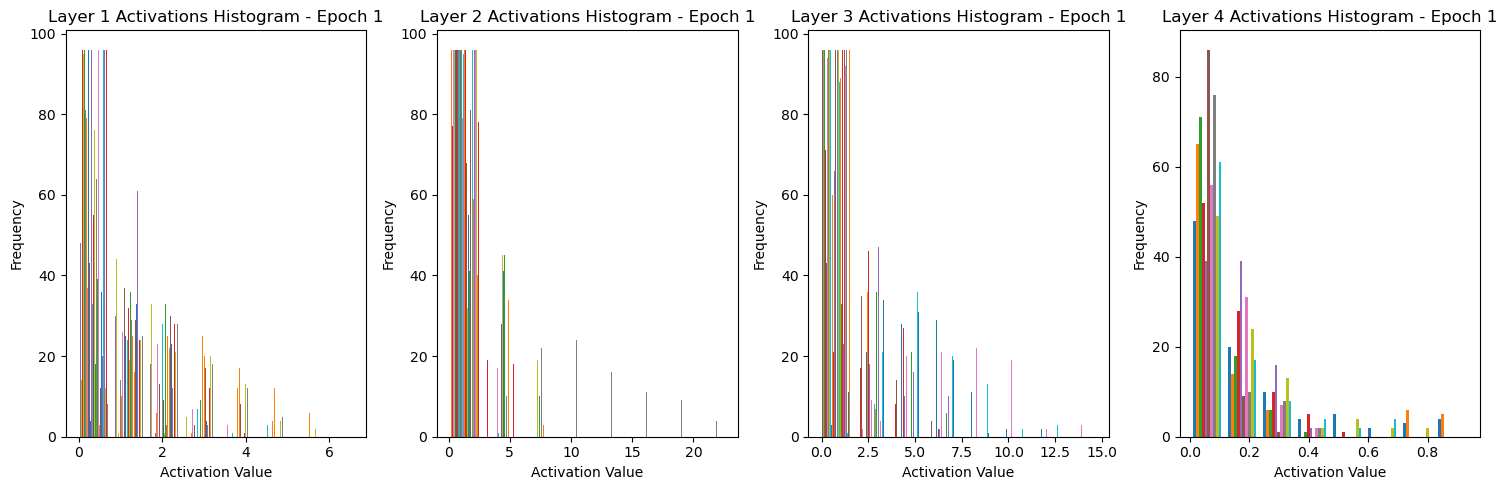

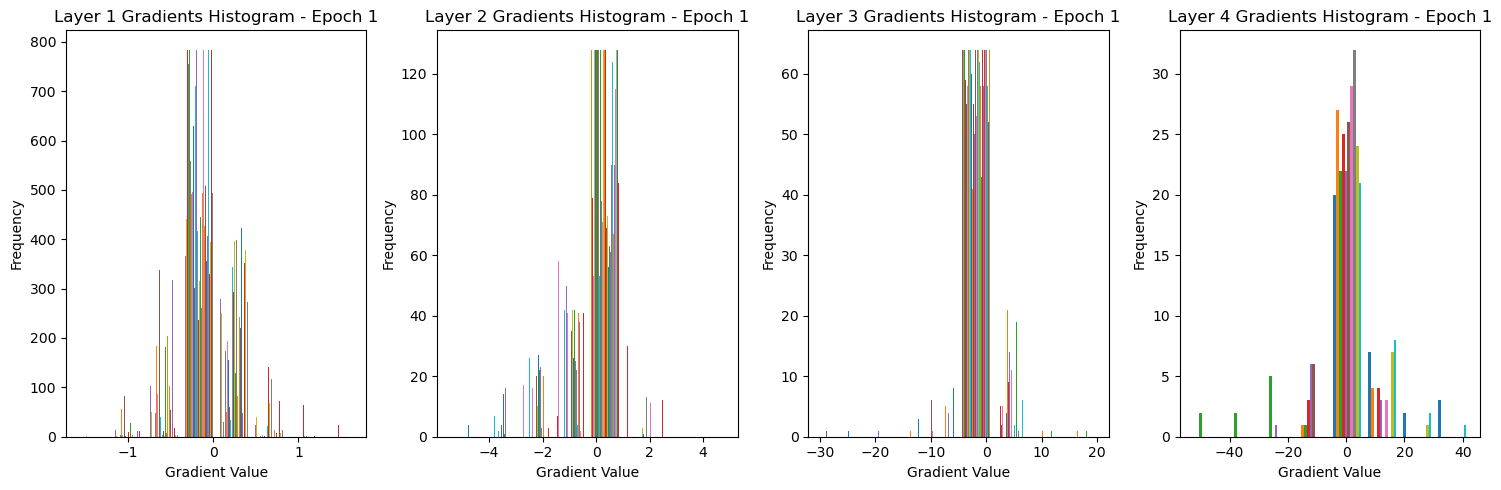

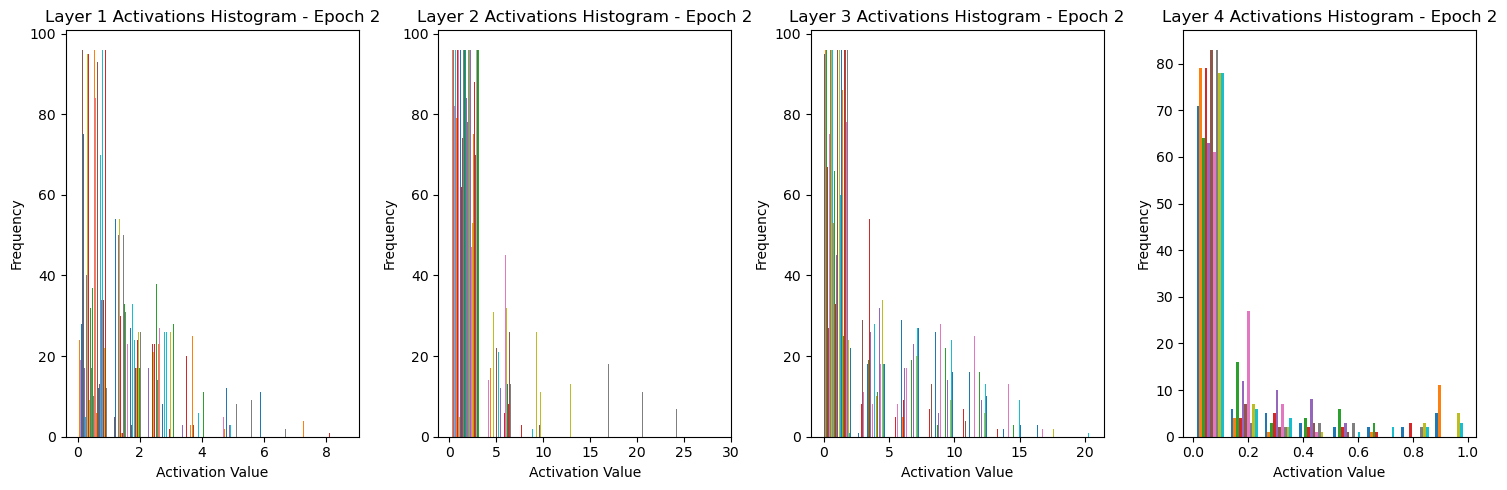

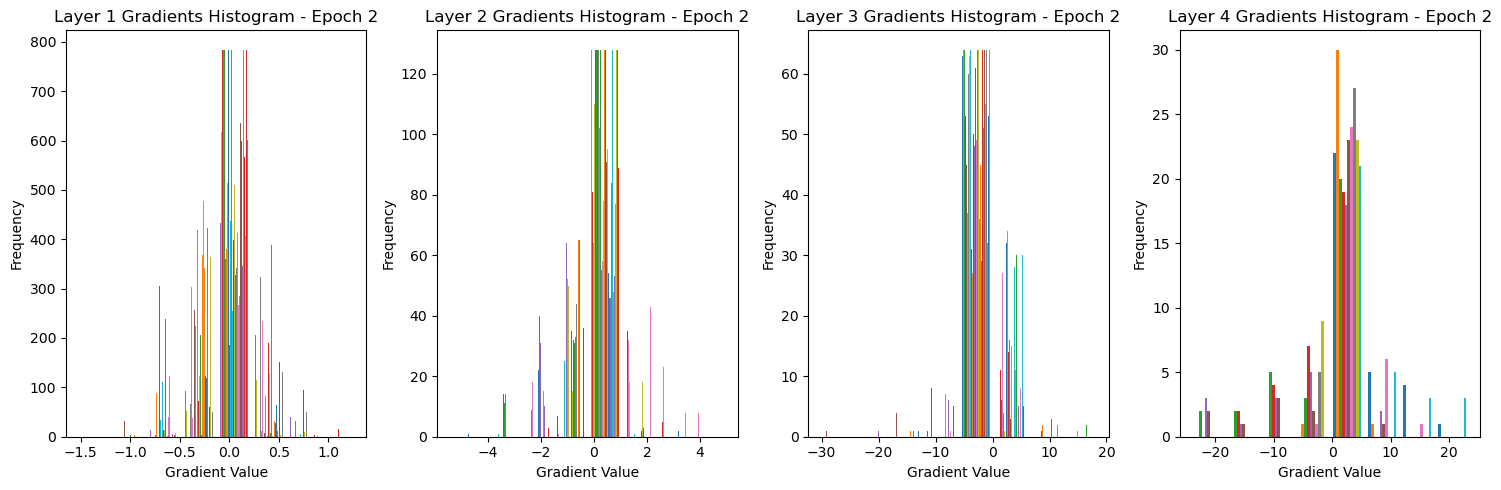

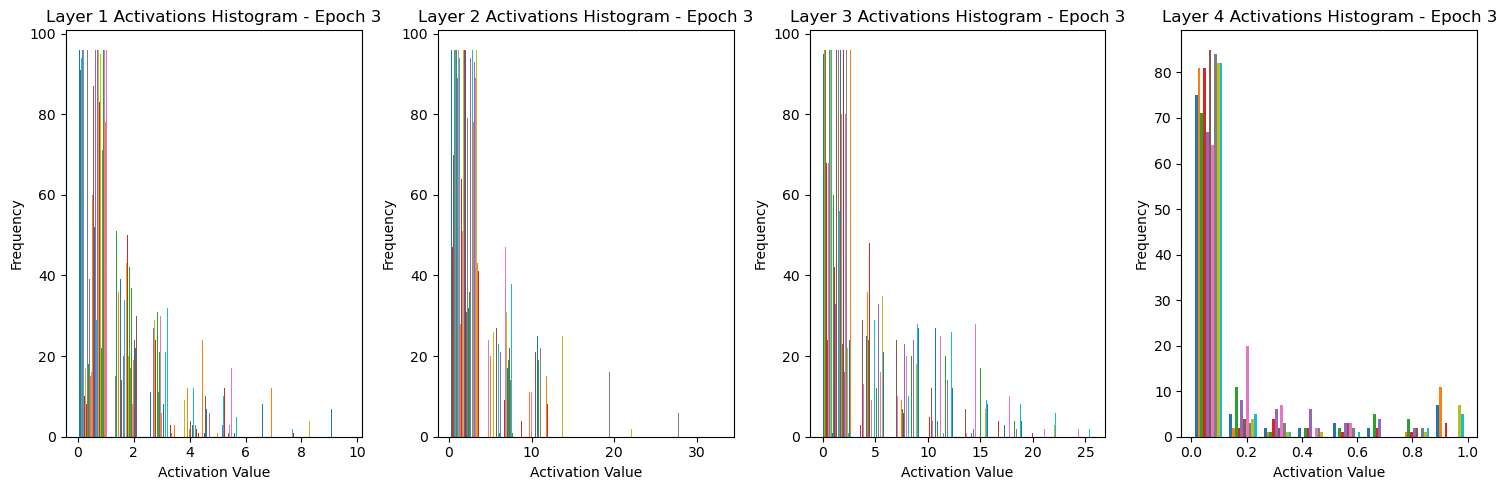

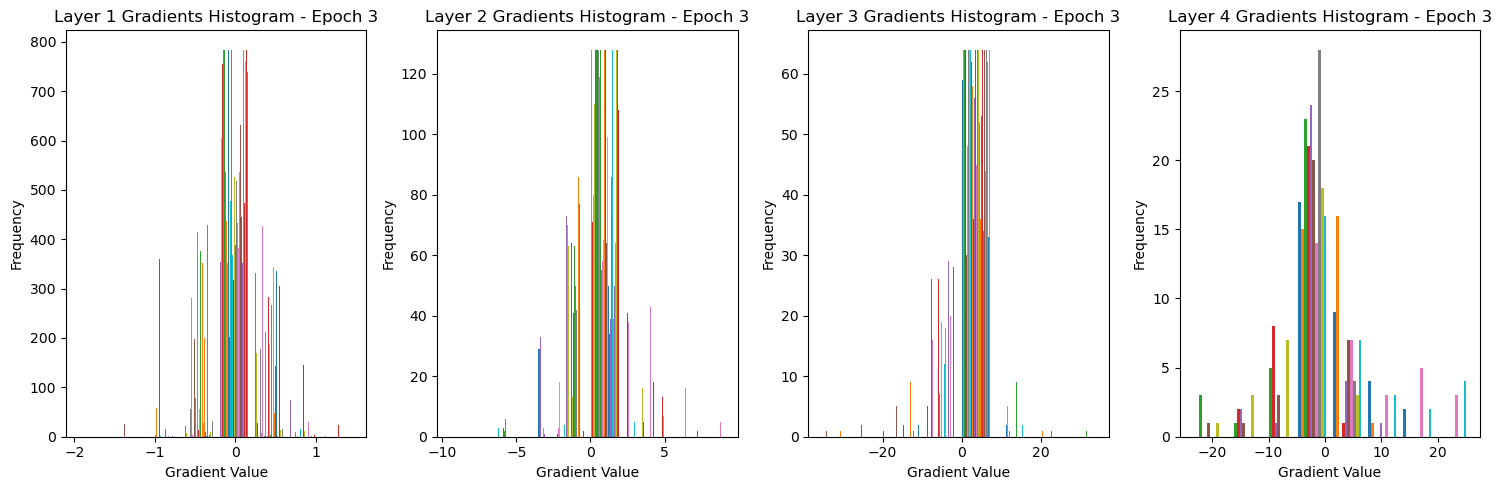

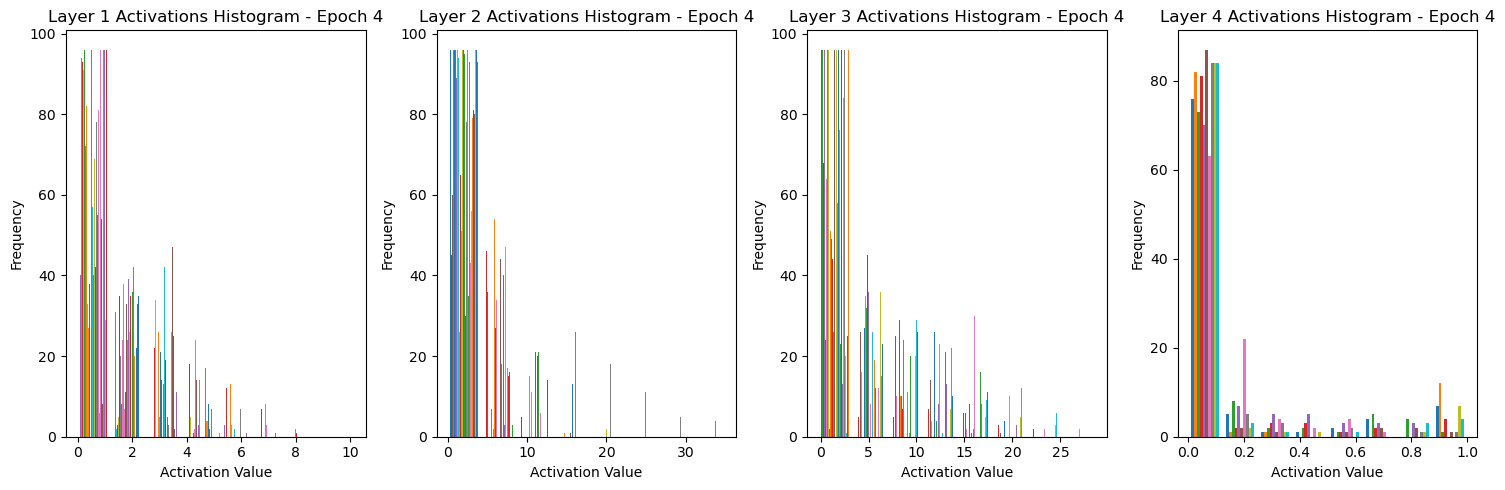

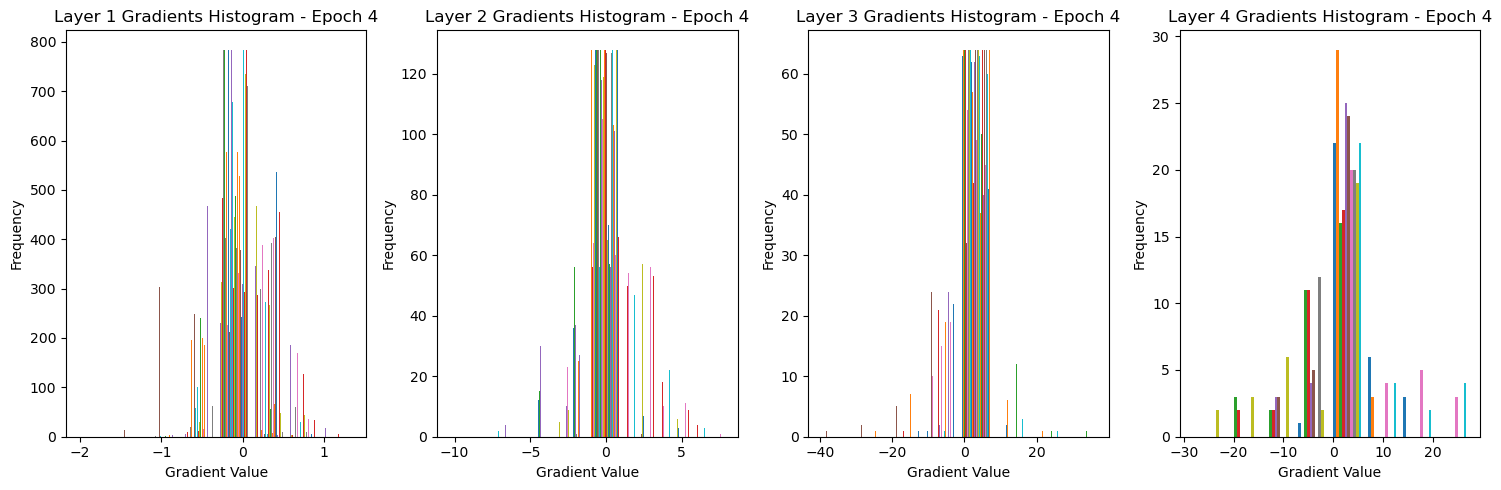

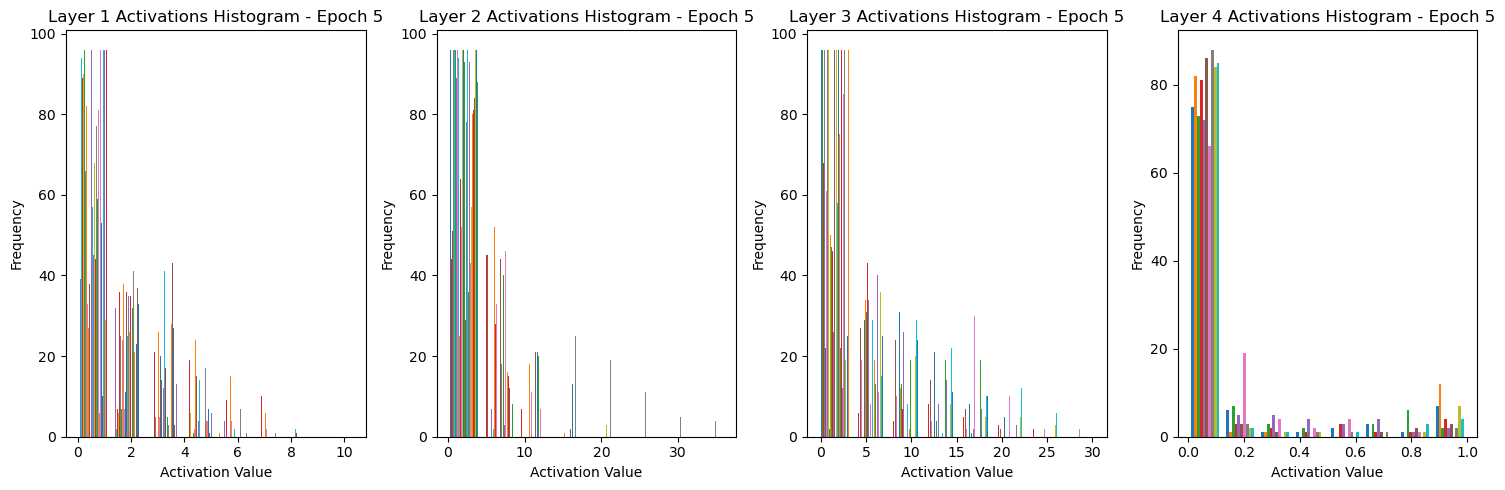

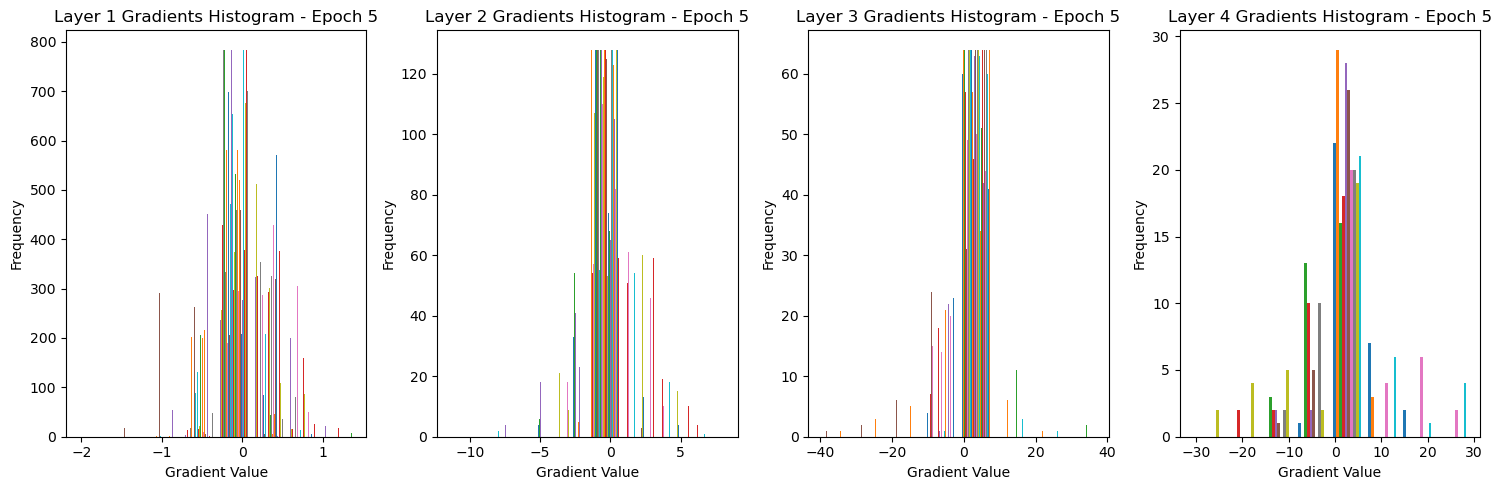

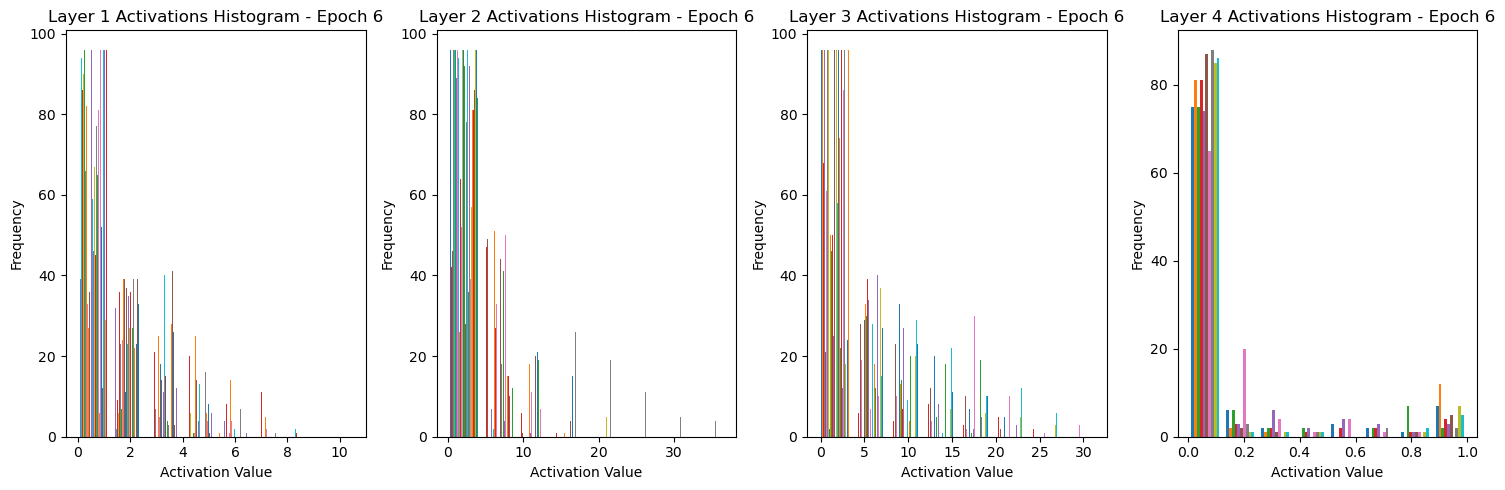

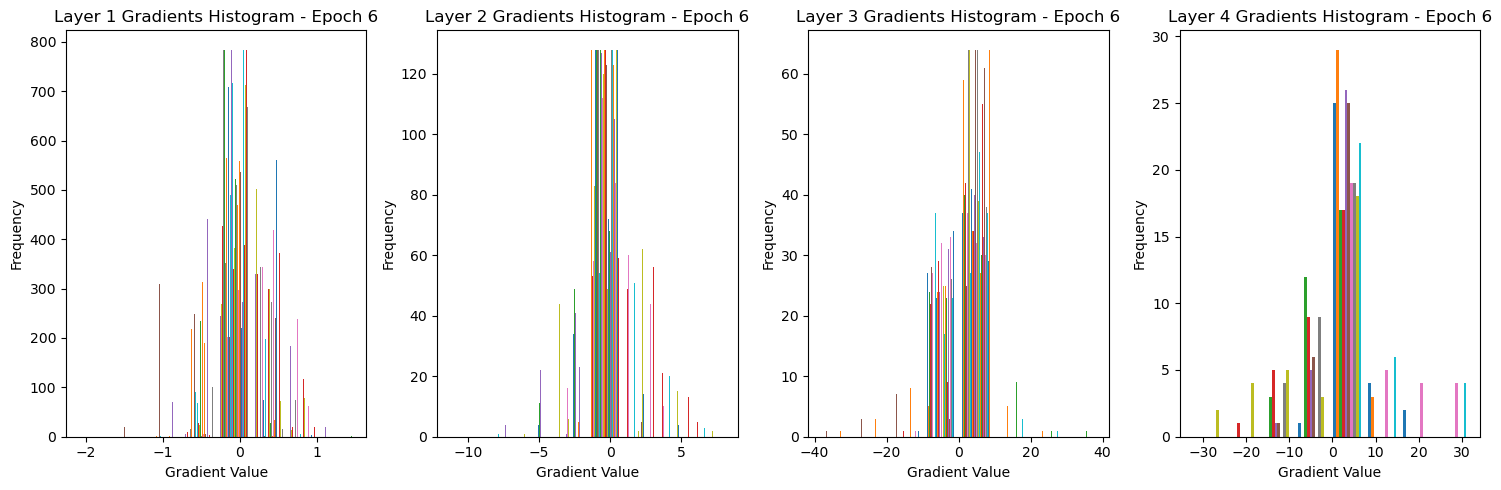

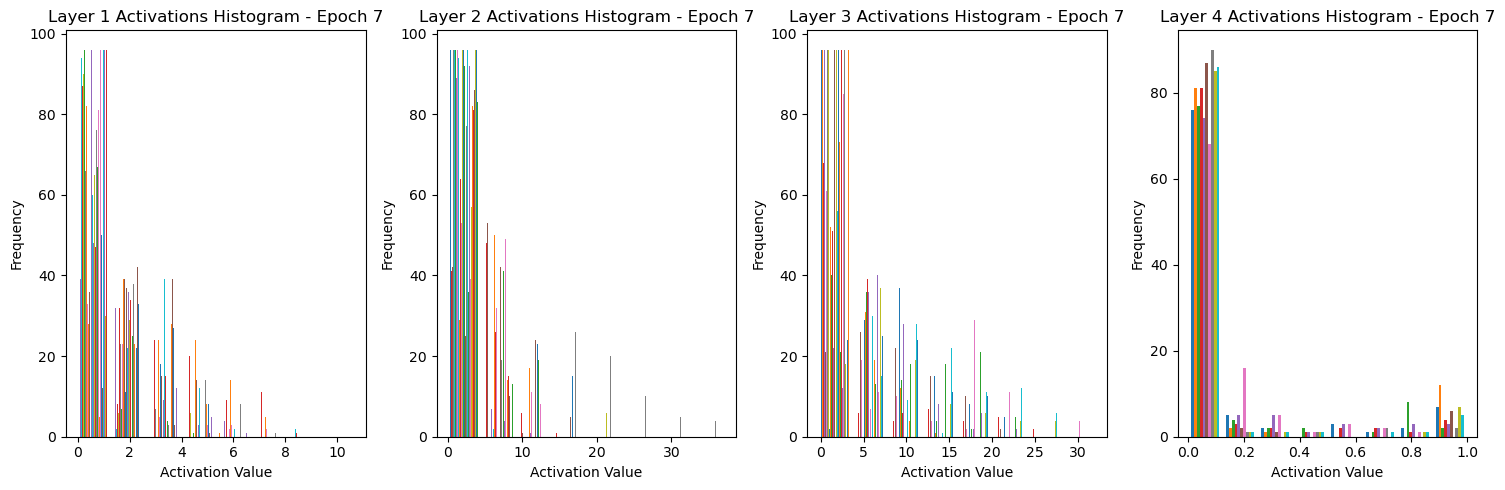

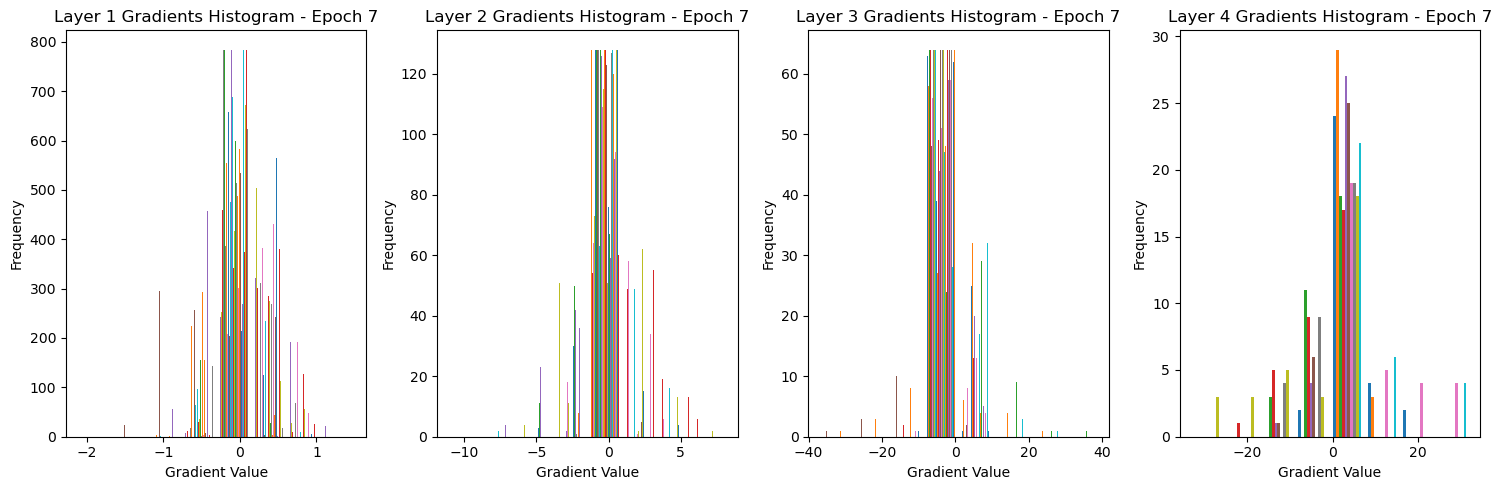

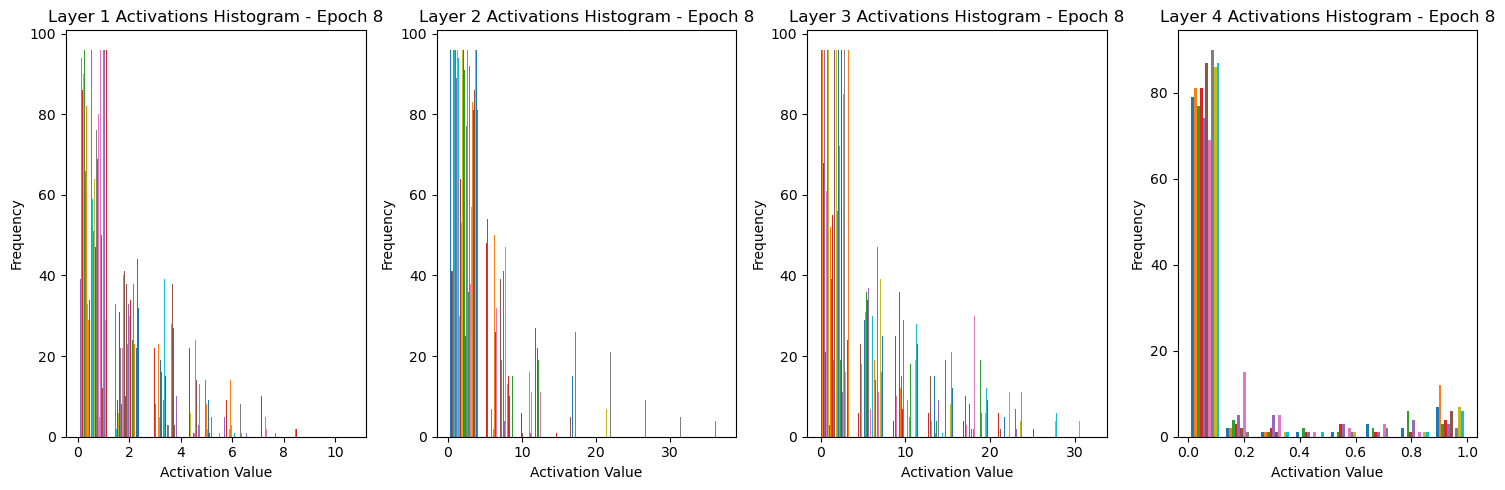

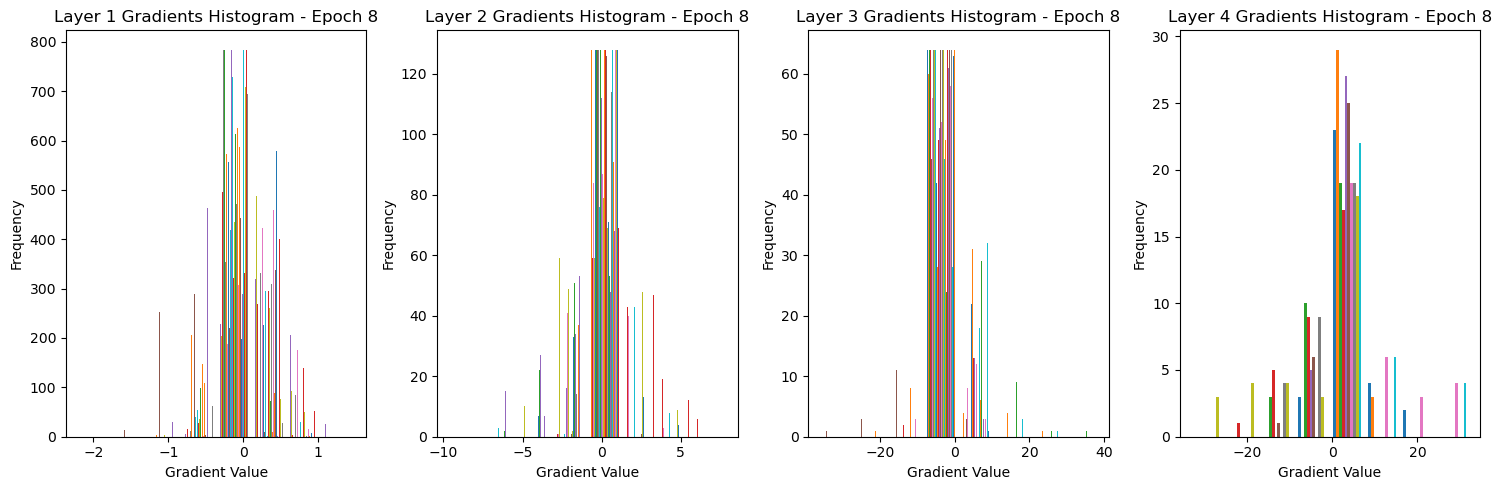

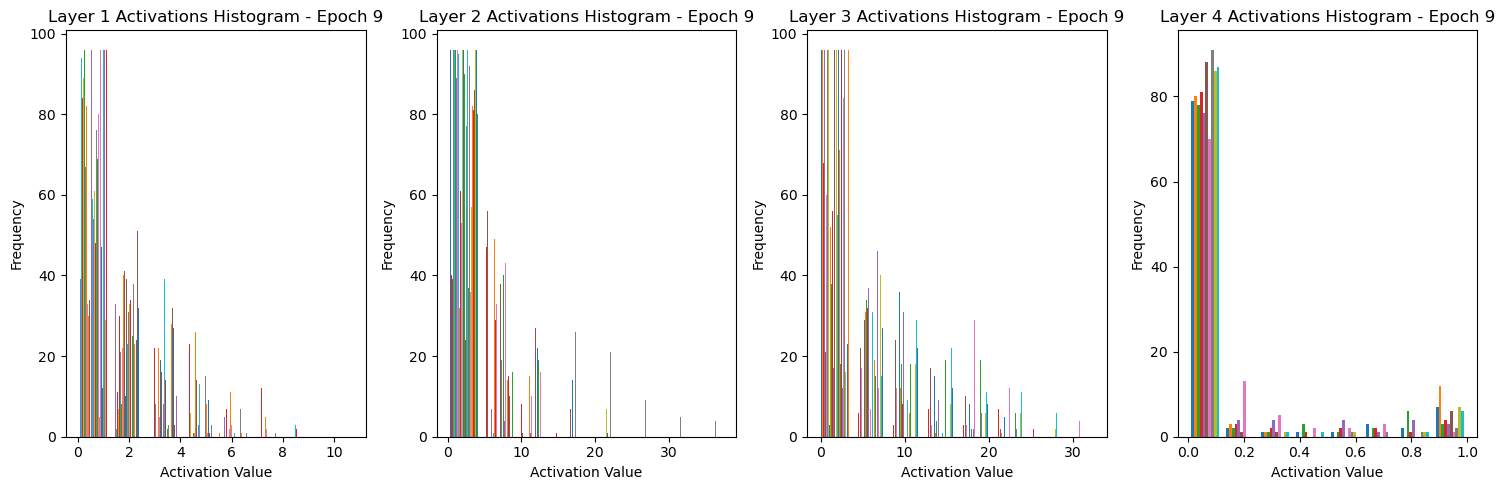

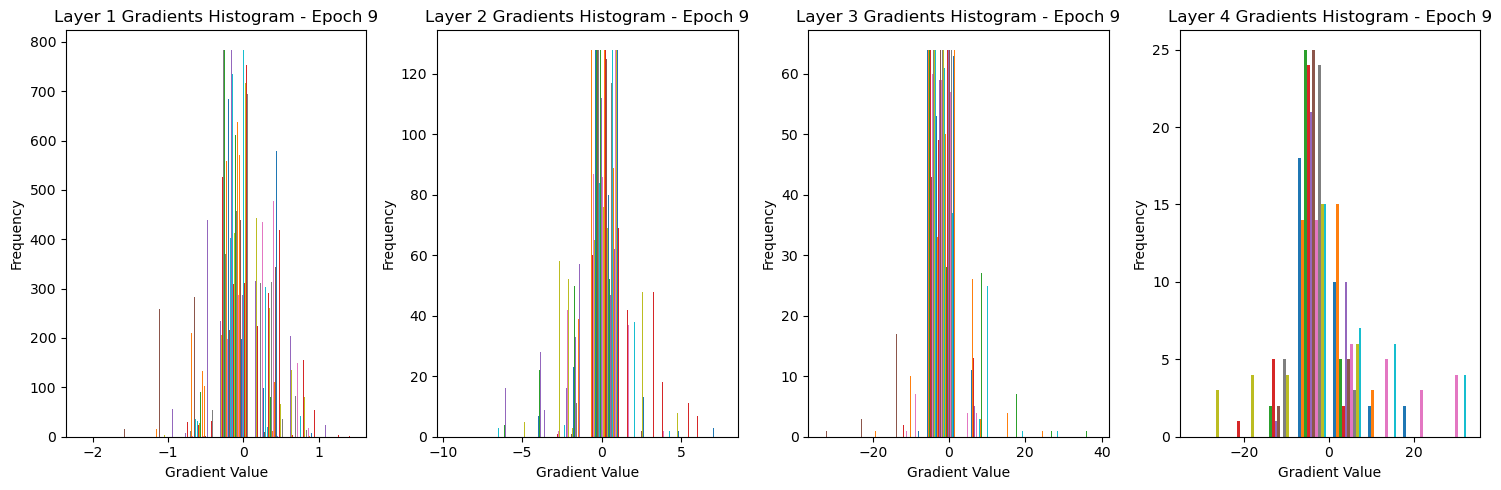

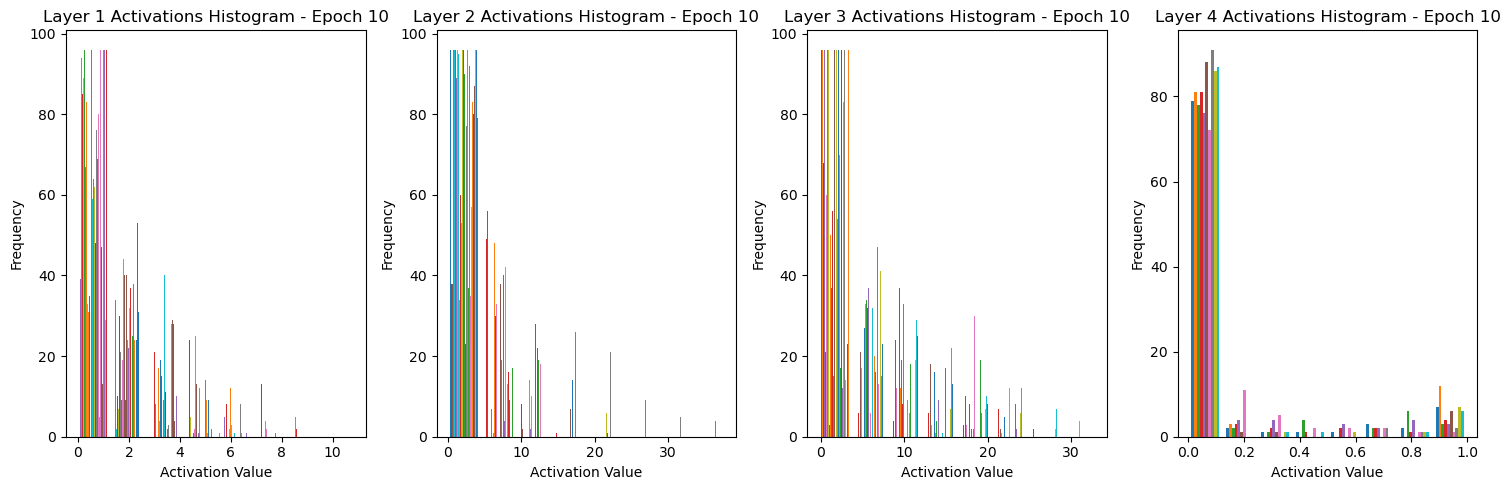

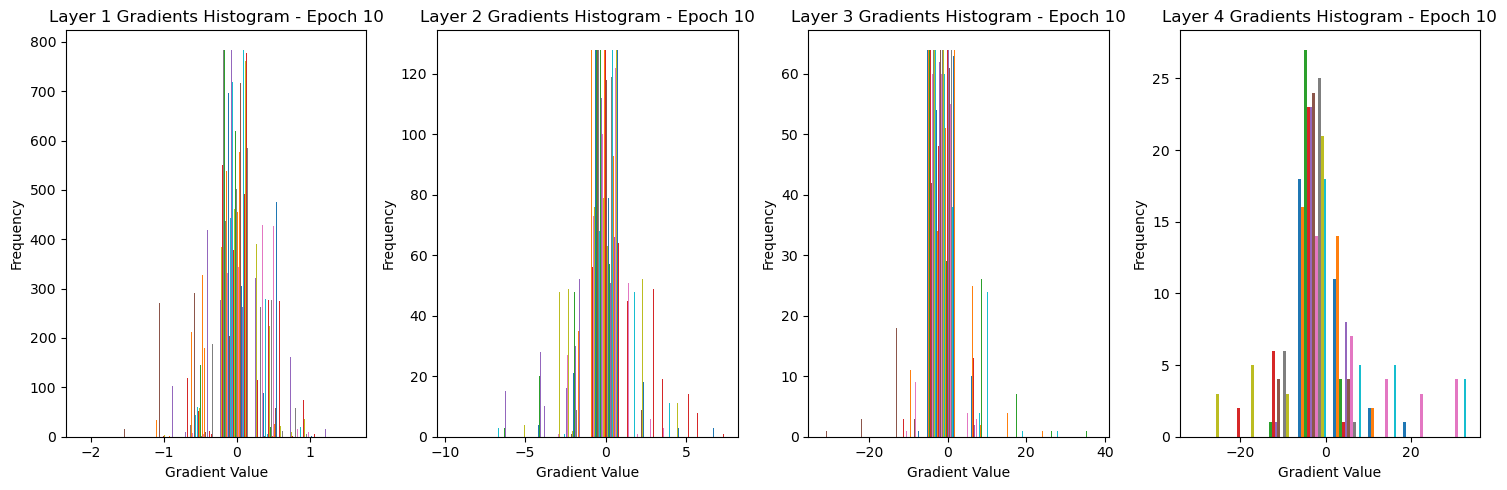

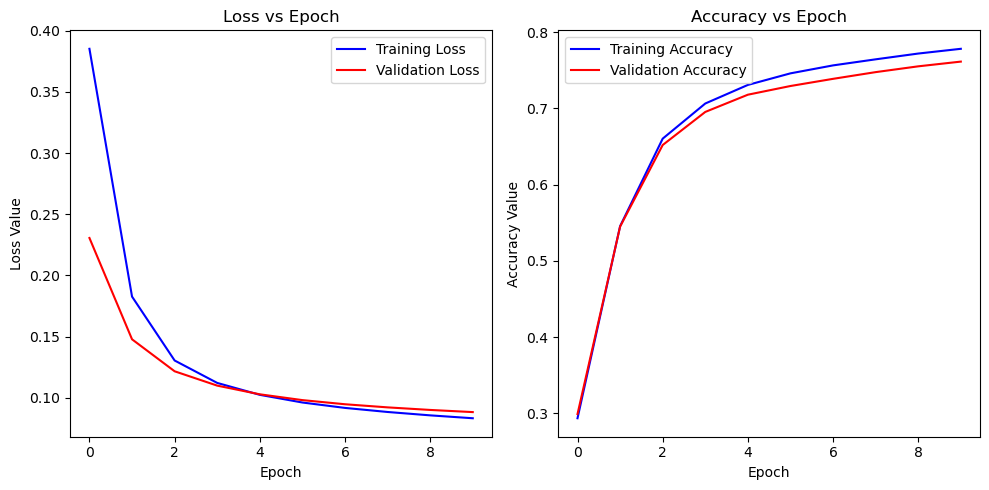

In [15]:
from nnlib.models.sequential import SequentialModel
from nnlib.layers.dense import Dense
from nnlib.activation_functions.leaky_relu import LeakyReLu
from nnlib.activation_functions.sigmoid import Sigmoid 
from nnlib.loss_functions.bce import BinaryCrossEntropy
from nnlib.optimization_functions.adam import AdaptiveMomentEstimation
from nnlib.initialization_functions.he import He

model = SequentialModel()

model.add(Dense(n_units= 128, input_dim=784, activation=LeakyReLu()))
model.add(Dense(n_units= 64, input_dim=128, activation=LeakyReLu()))
model.add(Dense(n_units= 32, input_dim=64, activation=LeakyReLu()))
model.add(Dense(n_units = 10, input_dim = 32, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.0001),
              loss=BinaryCrossEntropy(),
              initializer=He())

model.fit(X_train, y_train_onehot, epochs=10, batch_size=512, X_val=X_test, y_val=y_test, verbose=True)


In [16]:
model.export_net('models/fashion_MNIST_model.joblib')

In [17]:
from nnlib.models.sequential import SequentialModel
model = SequentialModel.import_net('models/fashion_MNIST_model.joblib')
predictions = model.predict(X_val)

In [18]:
pred_fashion=[]
for i in predictions:
    # print(i)
    pred_fashion.append(np.argmax(i))

In [19]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_val, axis=1), pred_fashion))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       487
           1       0.97      0.96      0.96       492
           2       0.75      0.70      0.72       514
           3       0.83      0.86      0.84       478
           4       0.69      0.79      0.74       506
           5       0.95      0.90      0.92       519
           6       0.65      0.54      0.59       496
           7       0.90      0.89      0.90       522
           8       0.94      0.96      0.95       490
           9       0.90      0.96      0.92       496

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.83      5000
weighted avg       0.84      0.84      0.83      5000



Epoch 1/10 - loss: 0.5348 - val_loss: 0.4351
Epoch 2/10 - loss: 0.3939 - val_loss: 0.3651
Epoch 3/10 - loss: 0.3505 - val_loss: 0.3397
Epoch 4/10 - loss: 0.3340 - val_loss: 0.3299
Epoch 5/10 - loss: 0.3278 - val_loss: 0.3264
Epoch 6/10 - loss: 0.3258 - val_loss: 0.3254
Epoch 7/10 - loss: 0.3252 - val_loss: 0.3251
Epoch 8/10 - loss: 0.3251 - val_loss: 0.3251
Epoch 9/10 - loss: 0.3251 - val_loss: 0.3251
Epoch 10/10 - loss: 0.3251 - val_loss: 0.3251


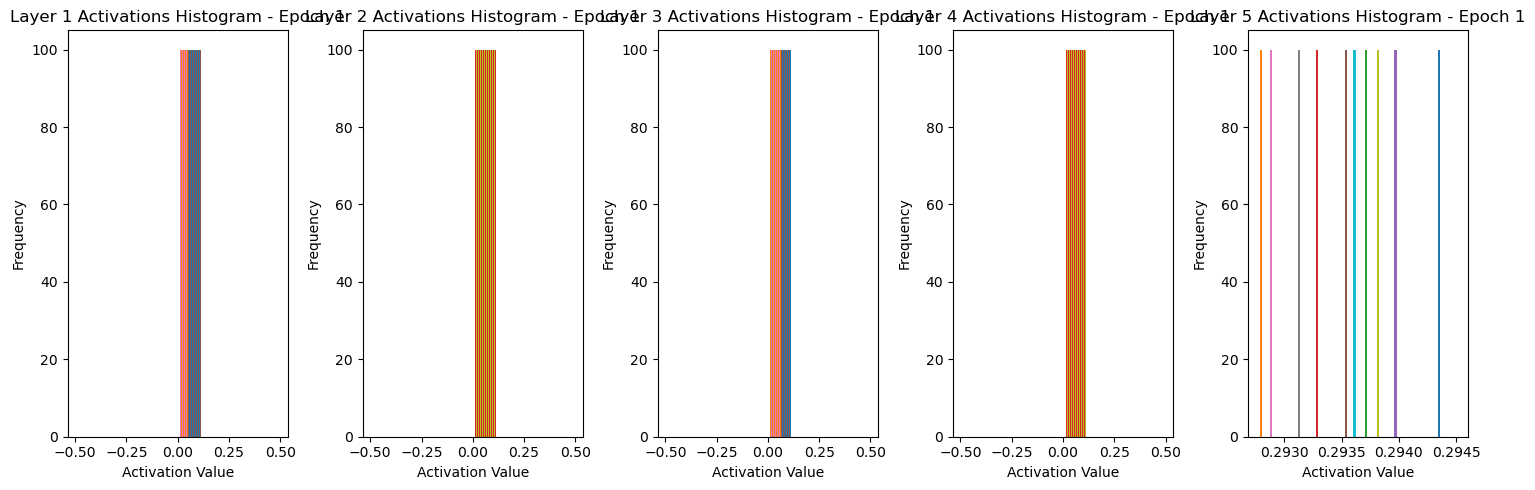

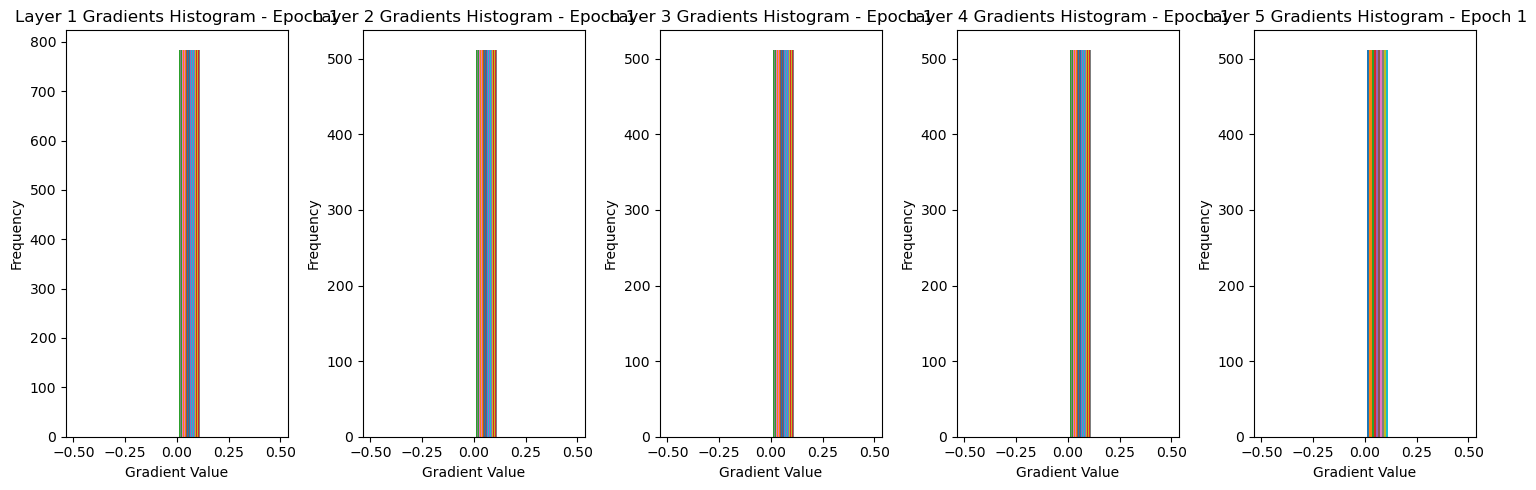

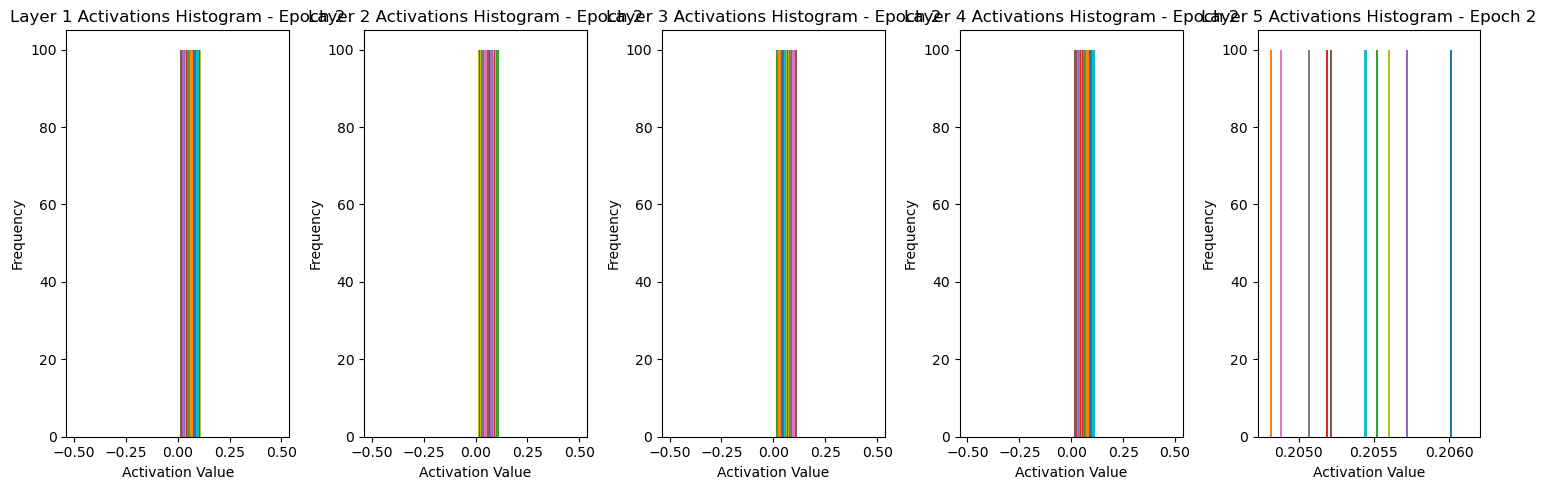

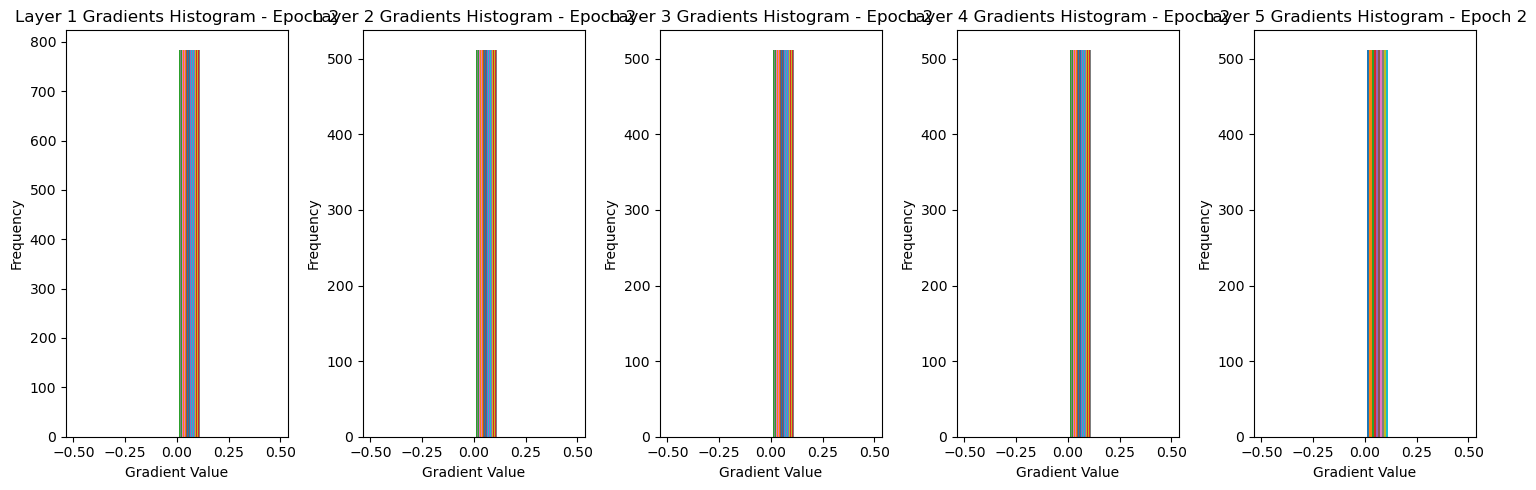

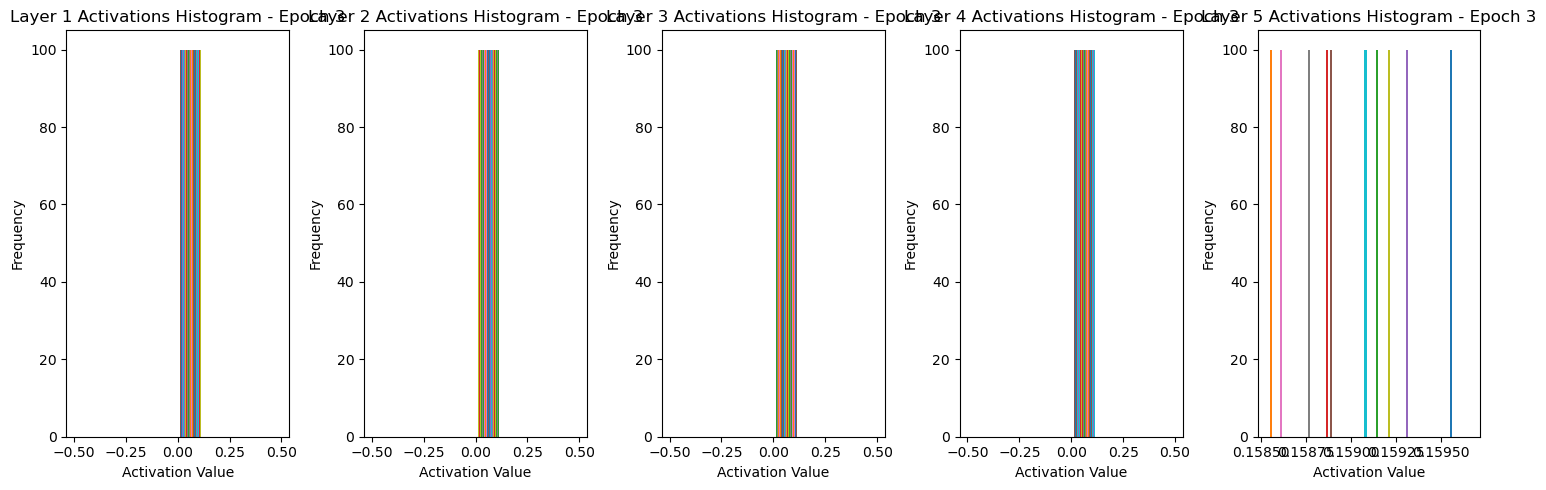

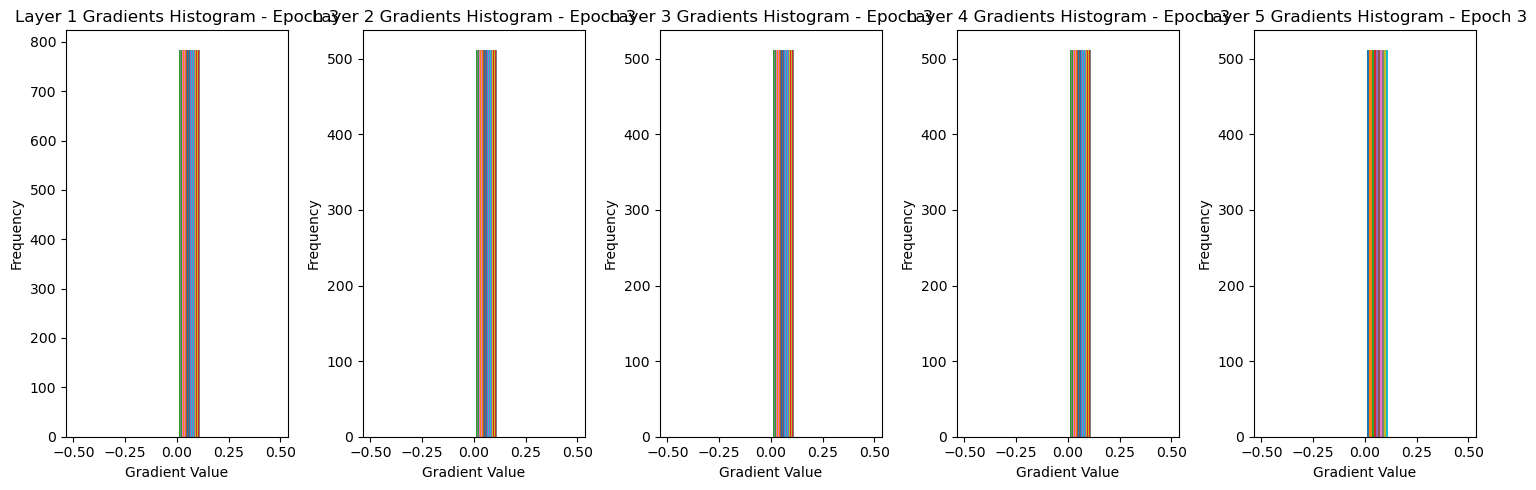

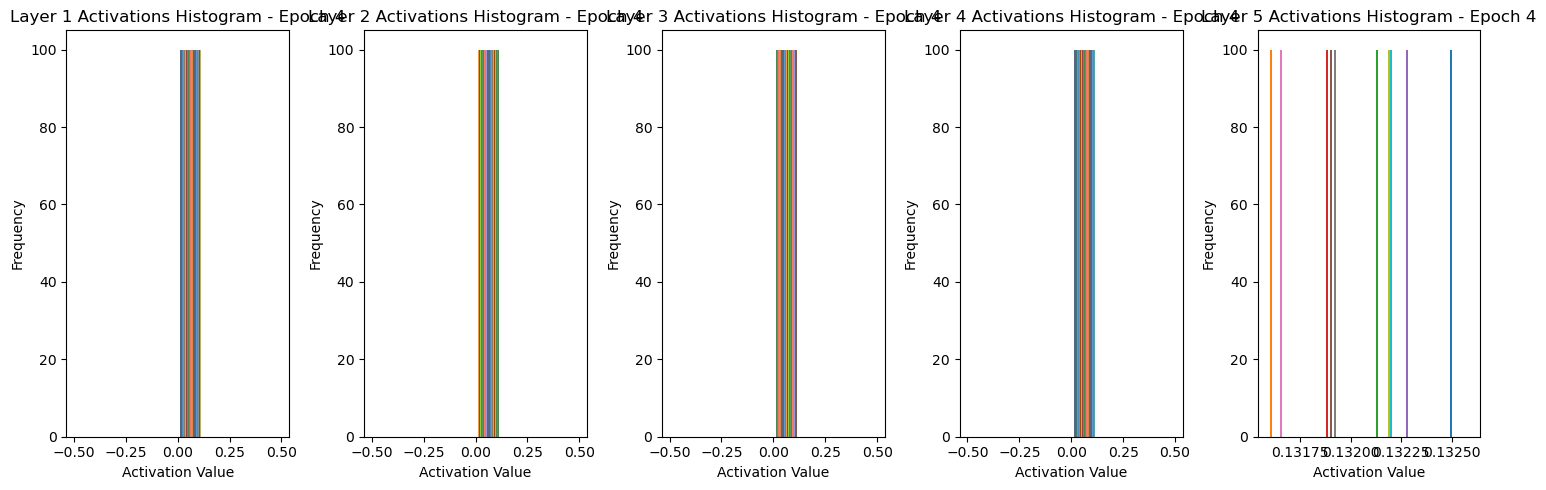

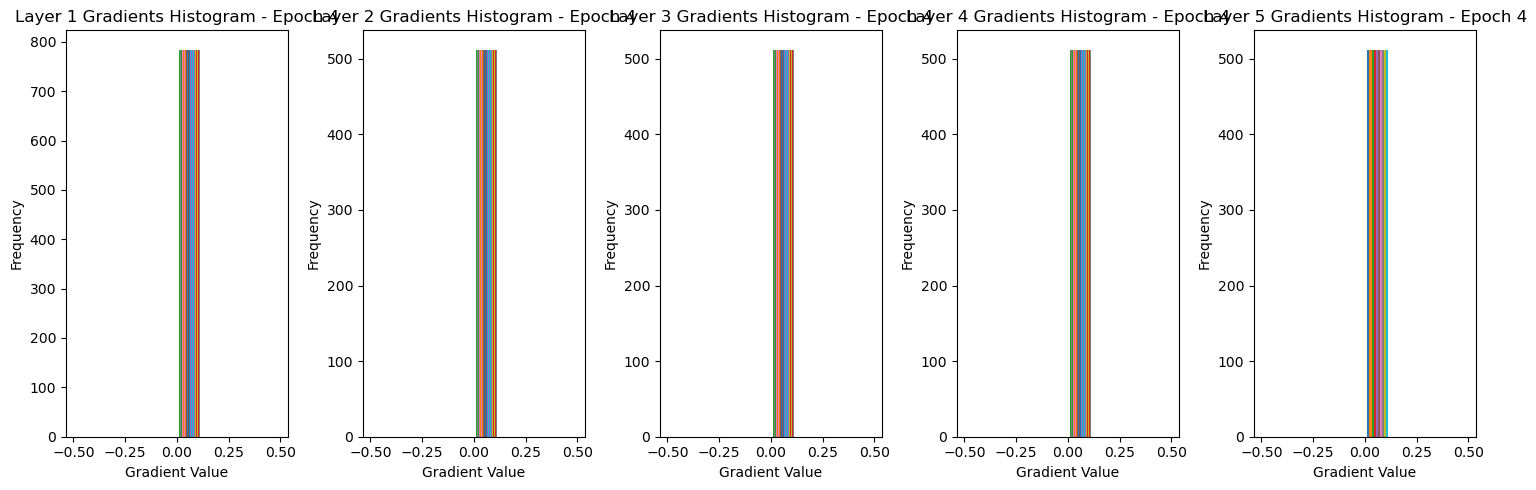

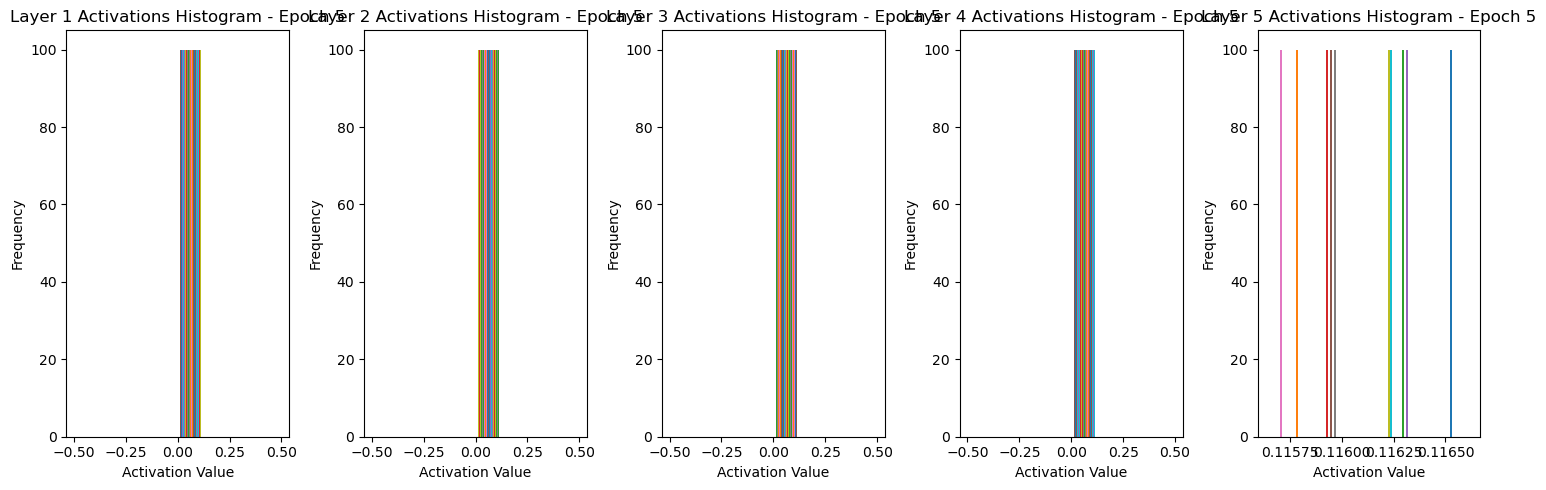

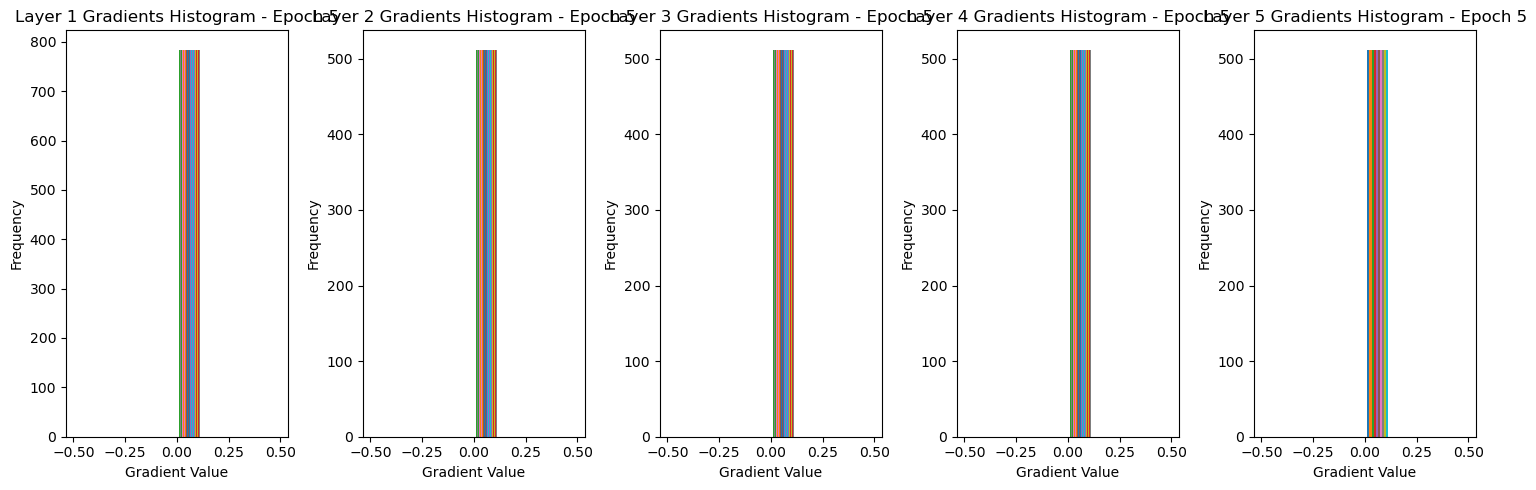

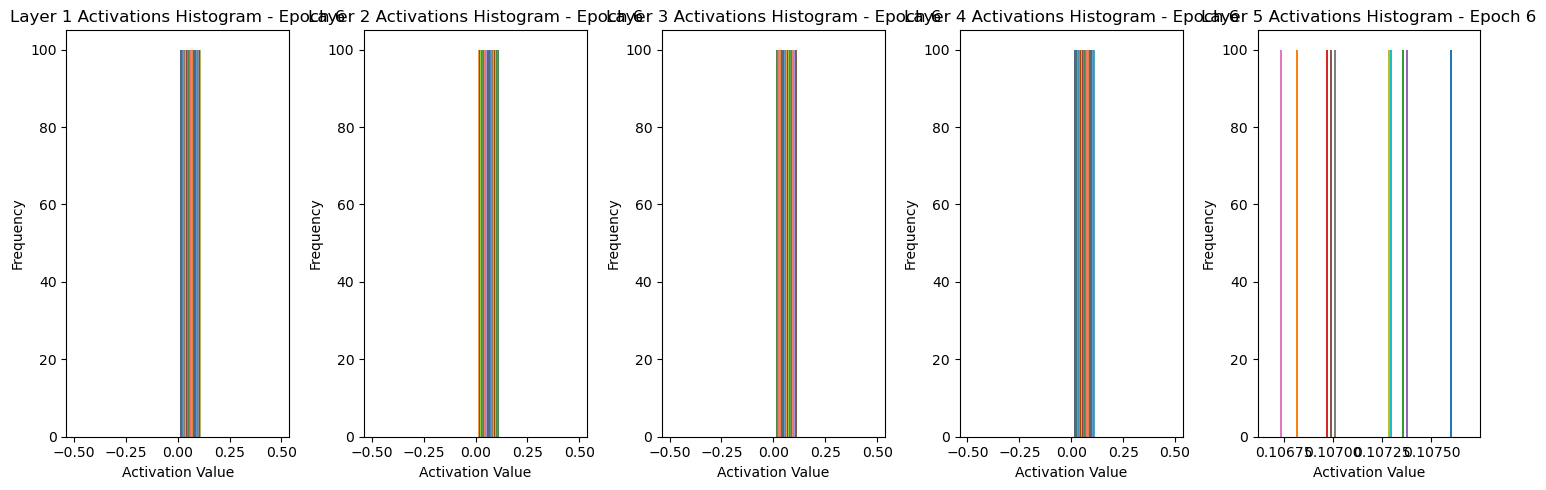

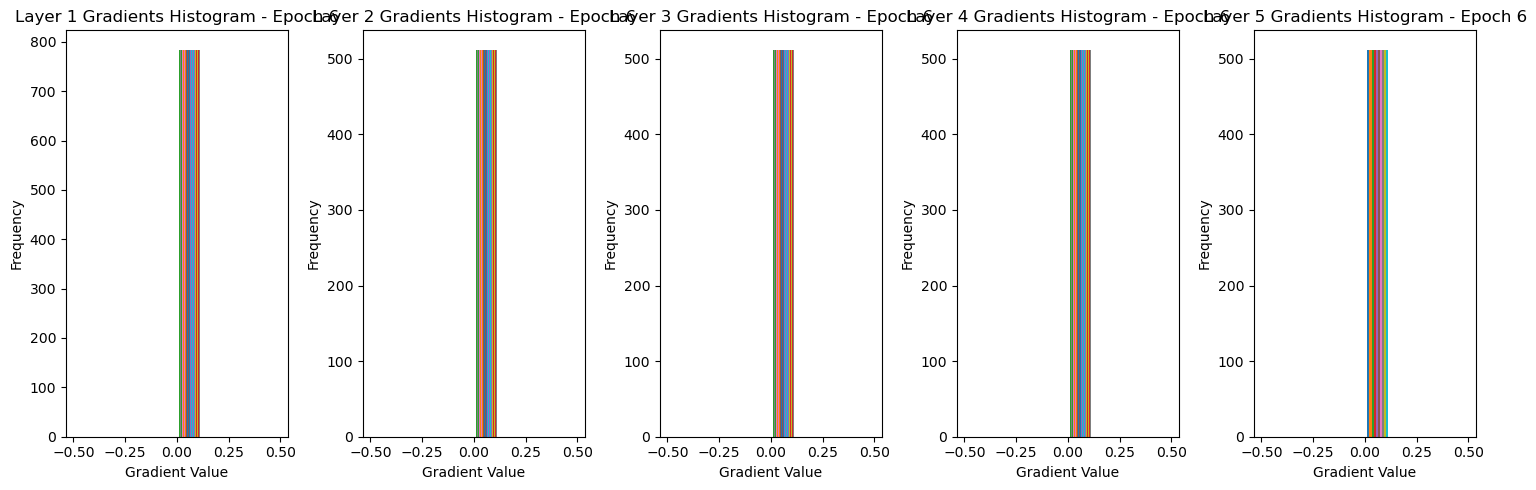

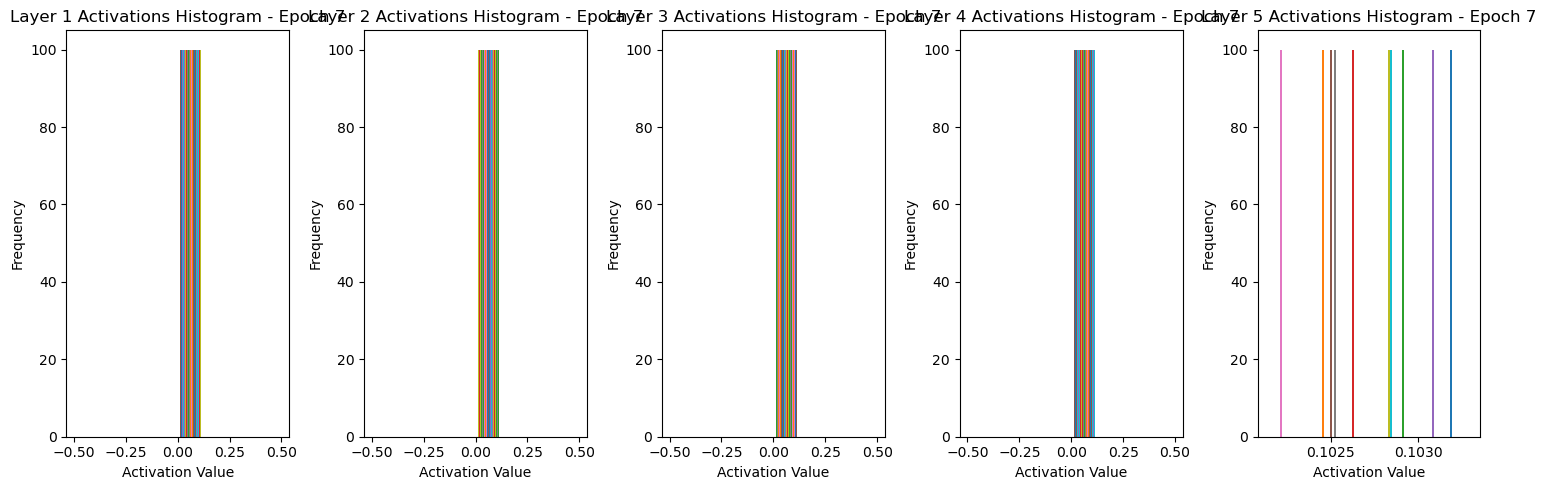

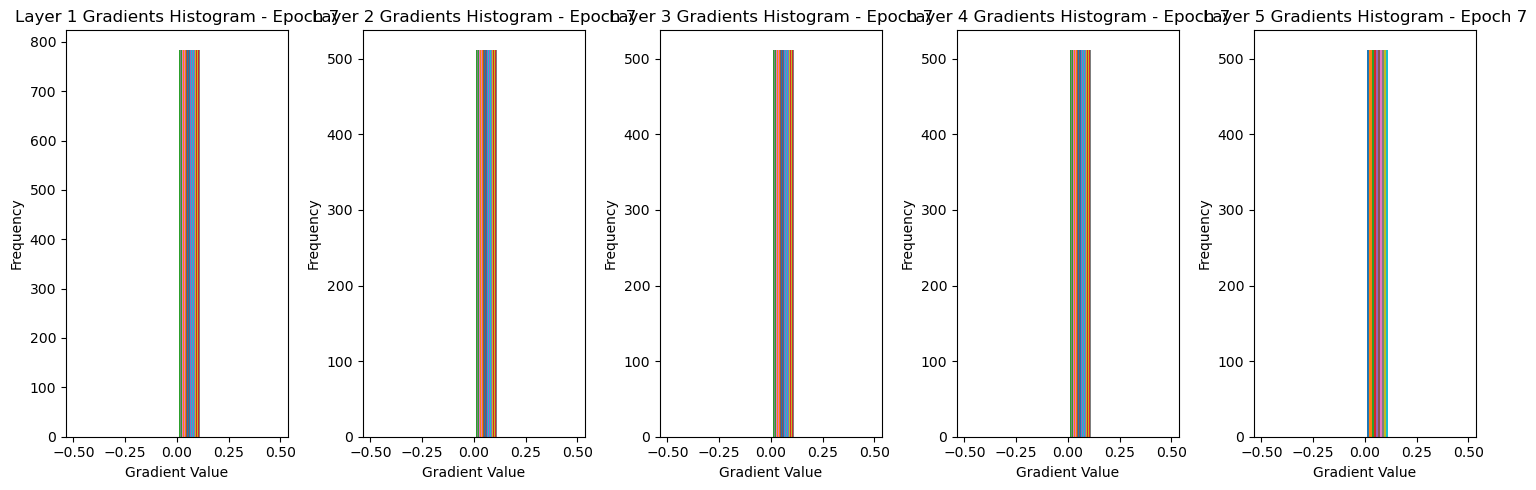

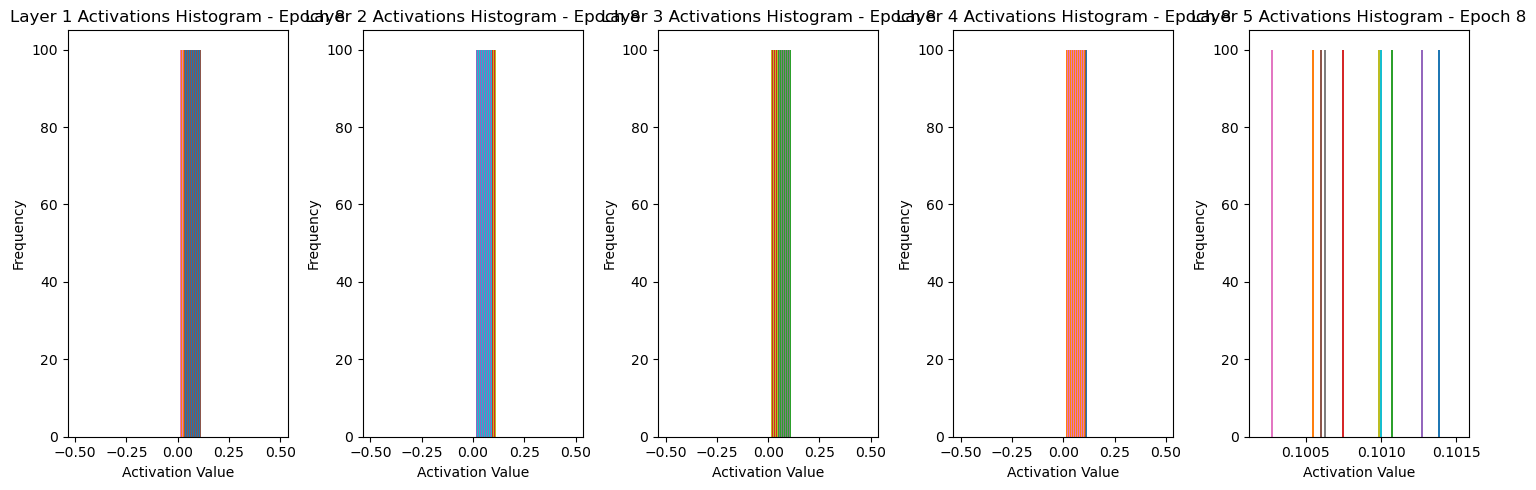

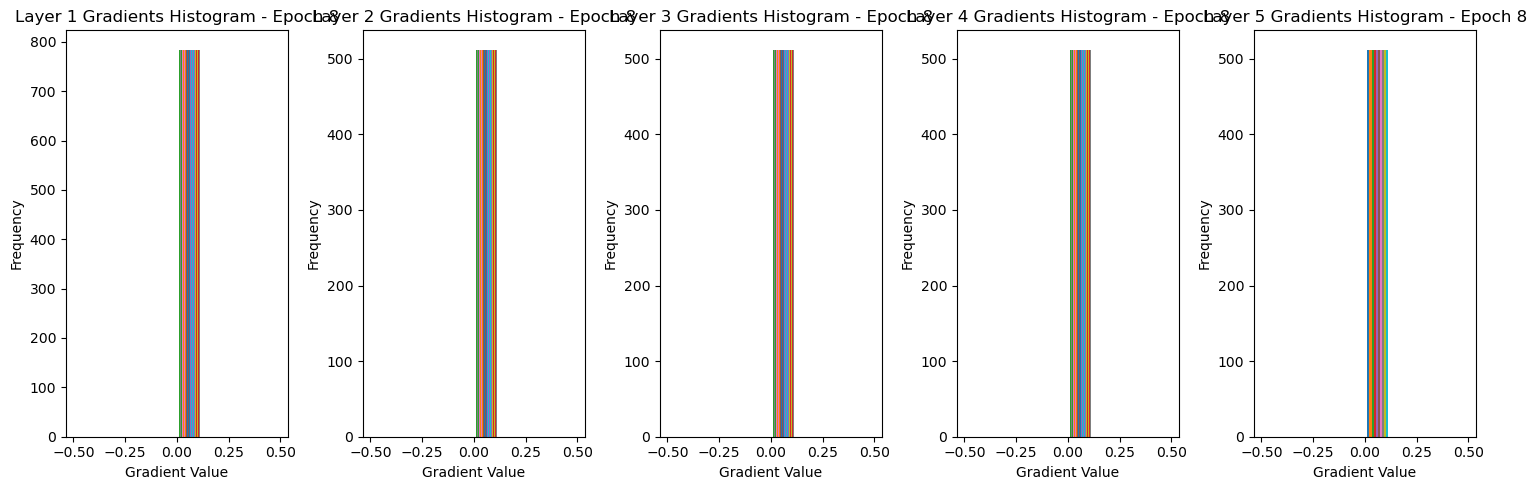

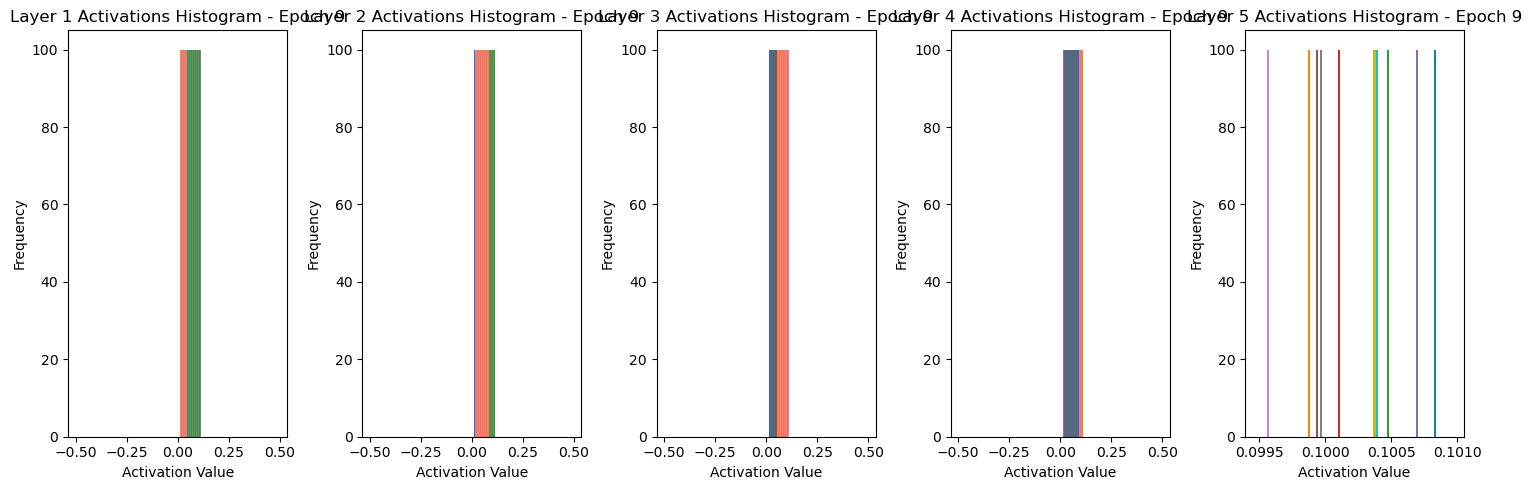

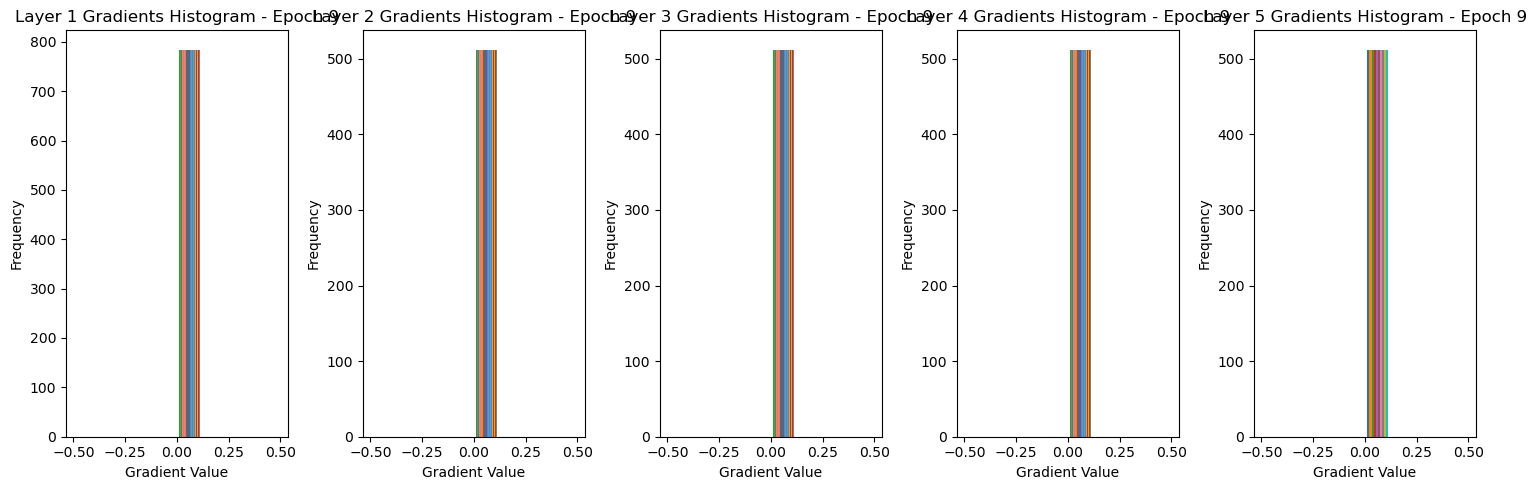

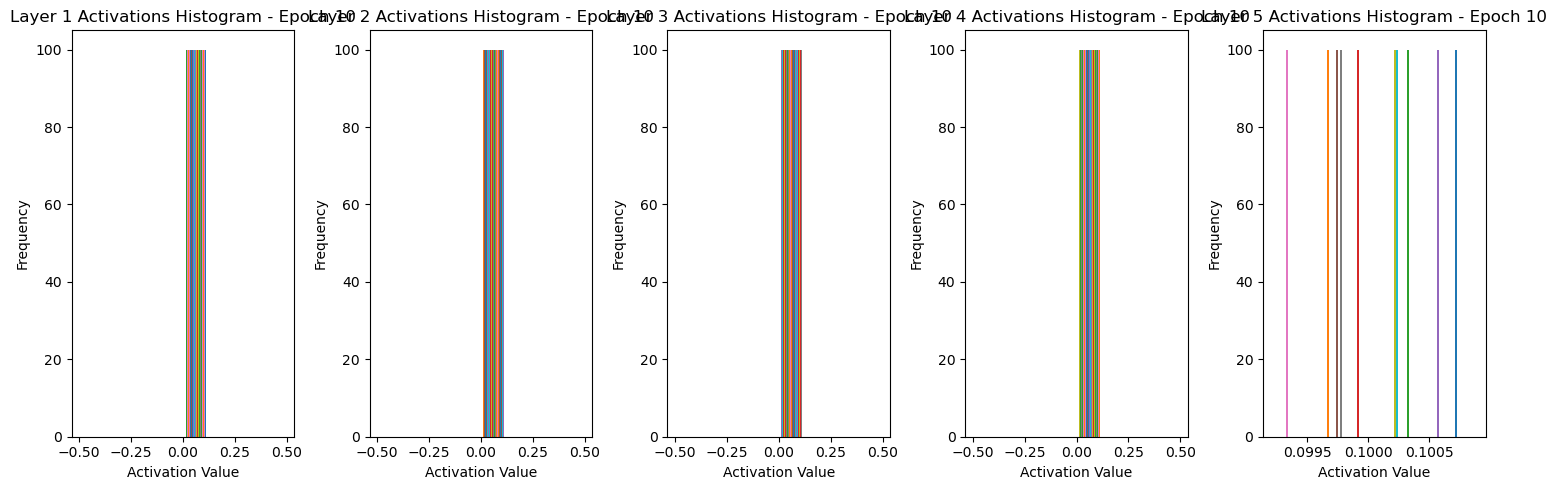

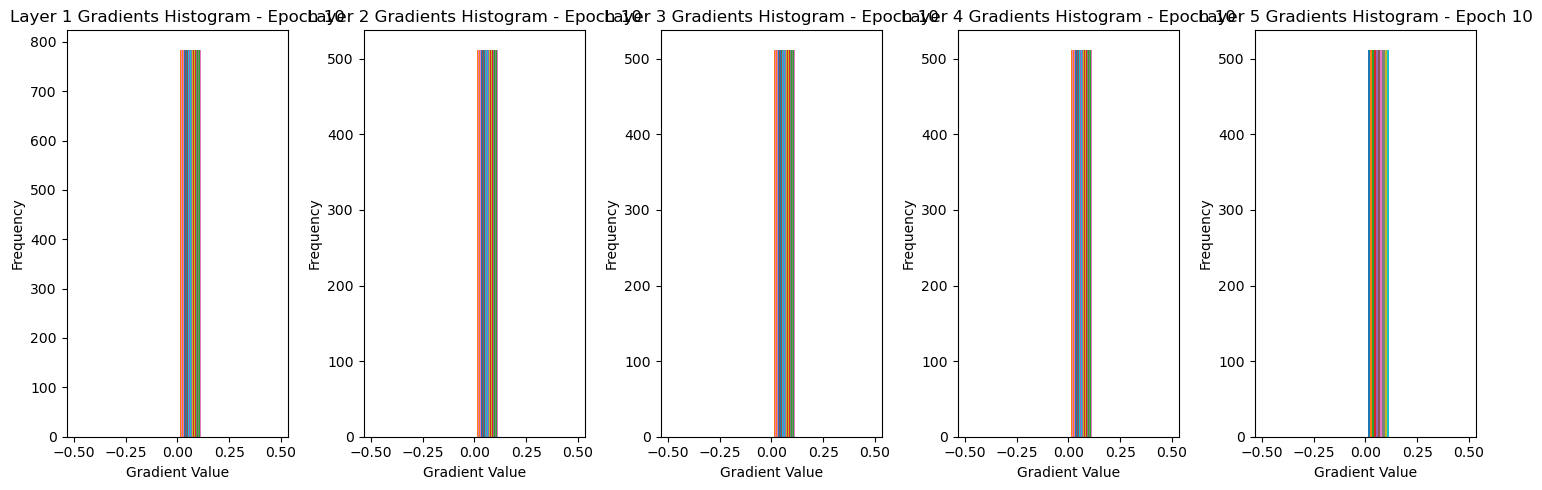

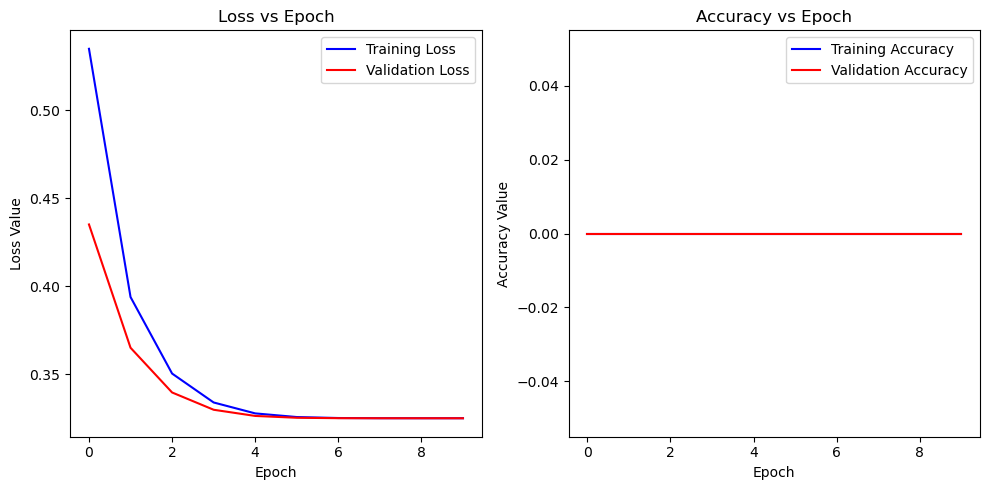

In [20]:
from nnlib.initialization_functions.uniform import Uniform
from nnlib.activation_functions.tanh import Tanh

model = SequentialModel()


model.add(Dense(n_units= 512, input_dim=784, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units = 10, input_dim = 512, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.001),
              loss=BinaryCrossEntropy(),
              initializer=Uniform(low_limit = 0, high_limit =0))

model.fit(X_train, y_train_onehot, epochs=10, batch_size=100, X_val=X_test, y_val=y_test, verbose=True)


Epoch 1/10 - loss: 1.4362 - val_loss: 0.8826
Epoch 2/10 - loss: 0.7346 - val_loss: 0.6320
Epoch 3/10 - loss: 0.4849 - val_loss: 0.3807
Epoch 4/10 - loss: 0.3197 - val_loss: 0.2841
Epoch 5/10 - loss: 0.2402 - val_loss: 0.2266
Epoch 6/10 - loss: 0.2029 - val_loss: 0.1970
Epoch 7/10 - loss: 0.1786 - val_loss: 0.1719
Epoch 8/10 - loss: 0.1616 - val_loss: 0.1612
Epoch 9/10 - loss: 0.1507 - val_loss: 0.1495
Epoch 10/10 - loss: 0.1414 - val_loss: 0.1432


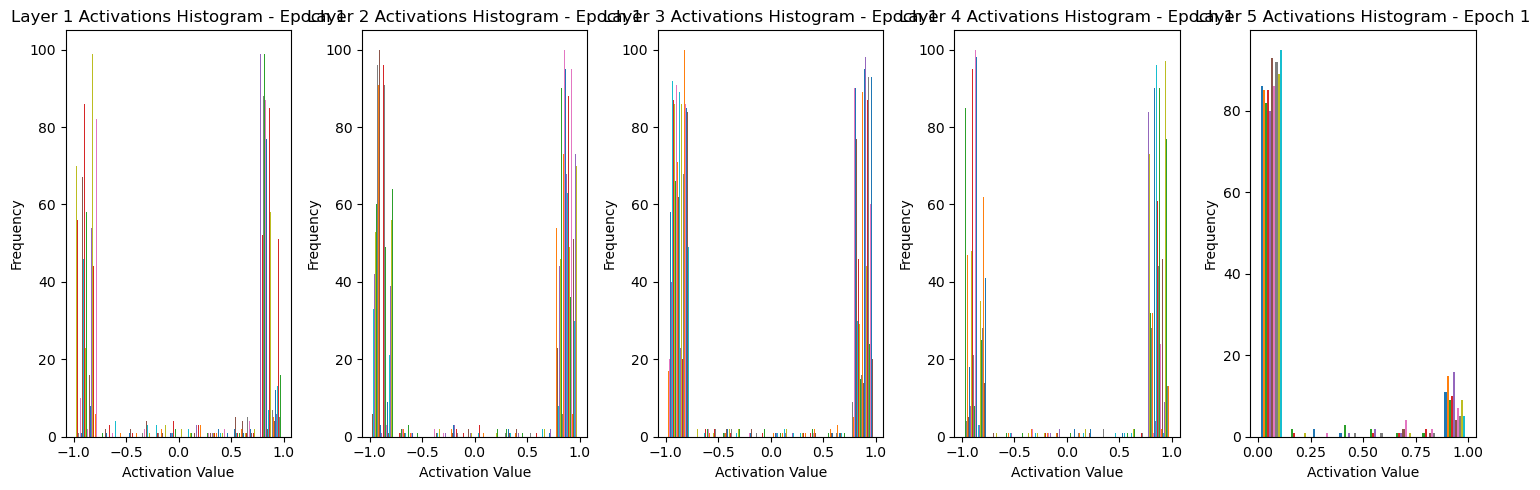

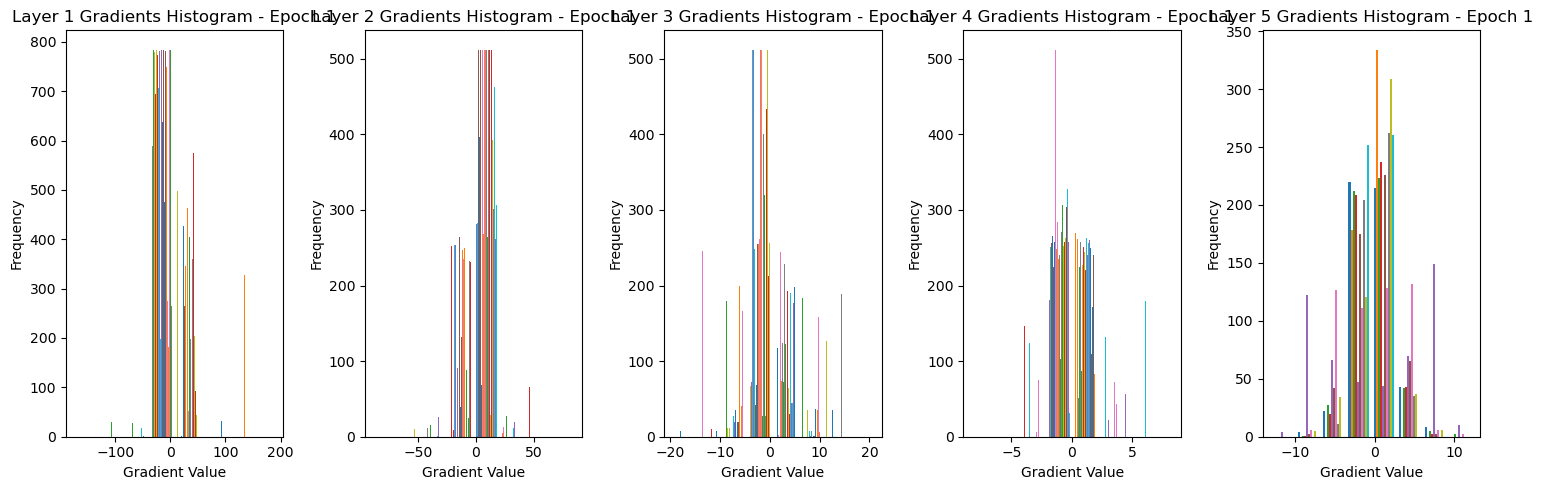

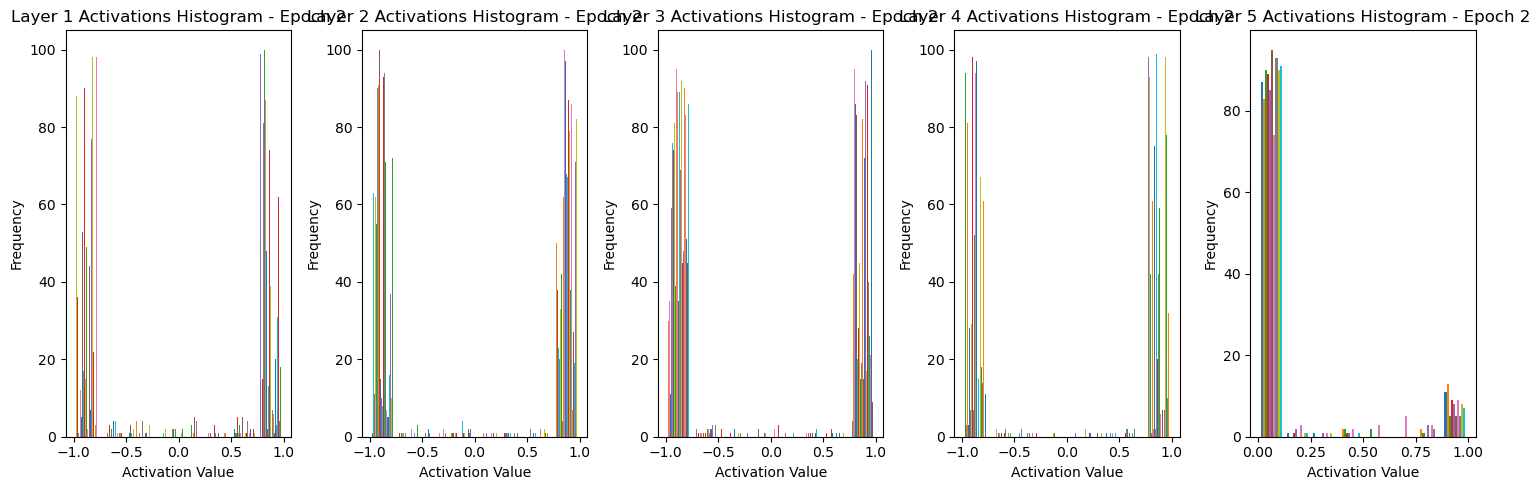

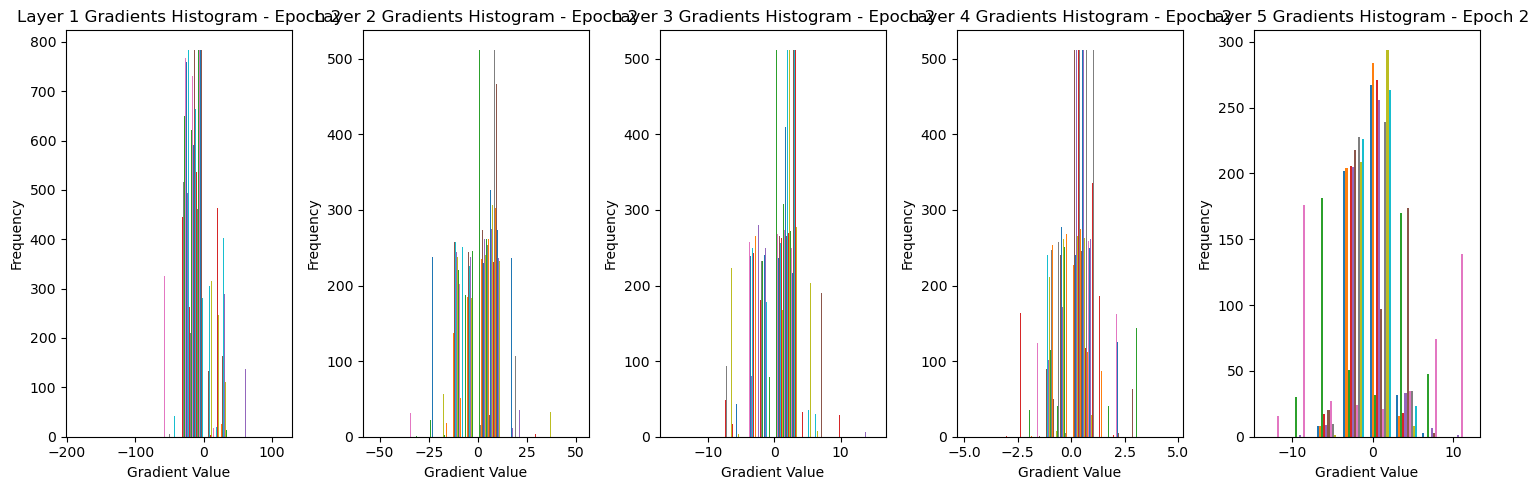

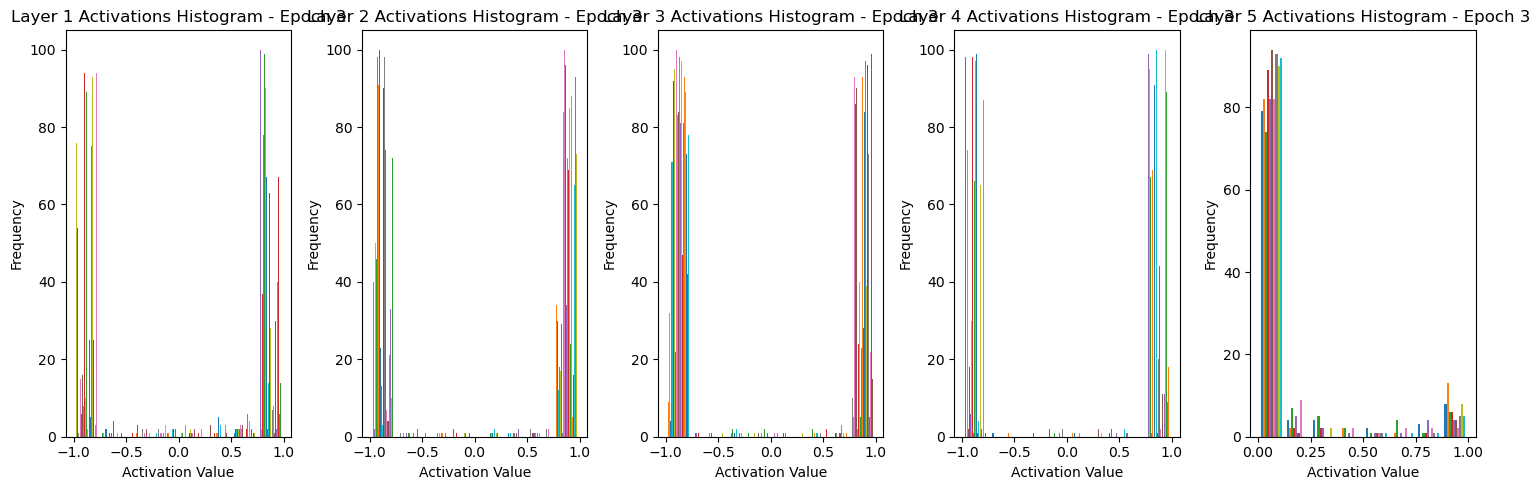

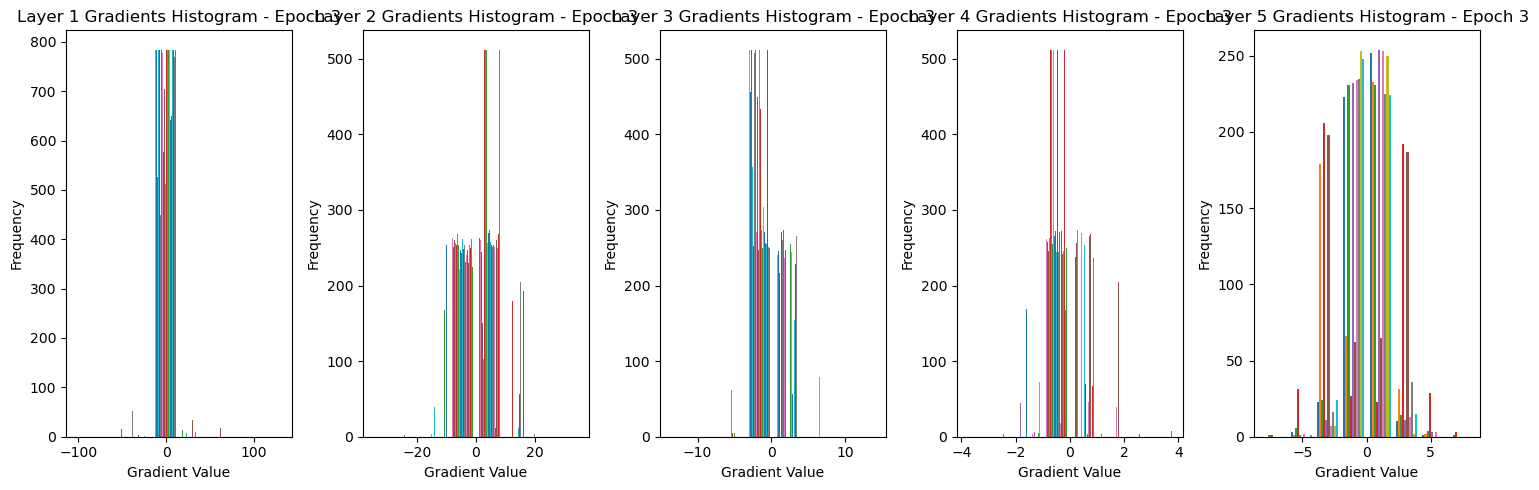

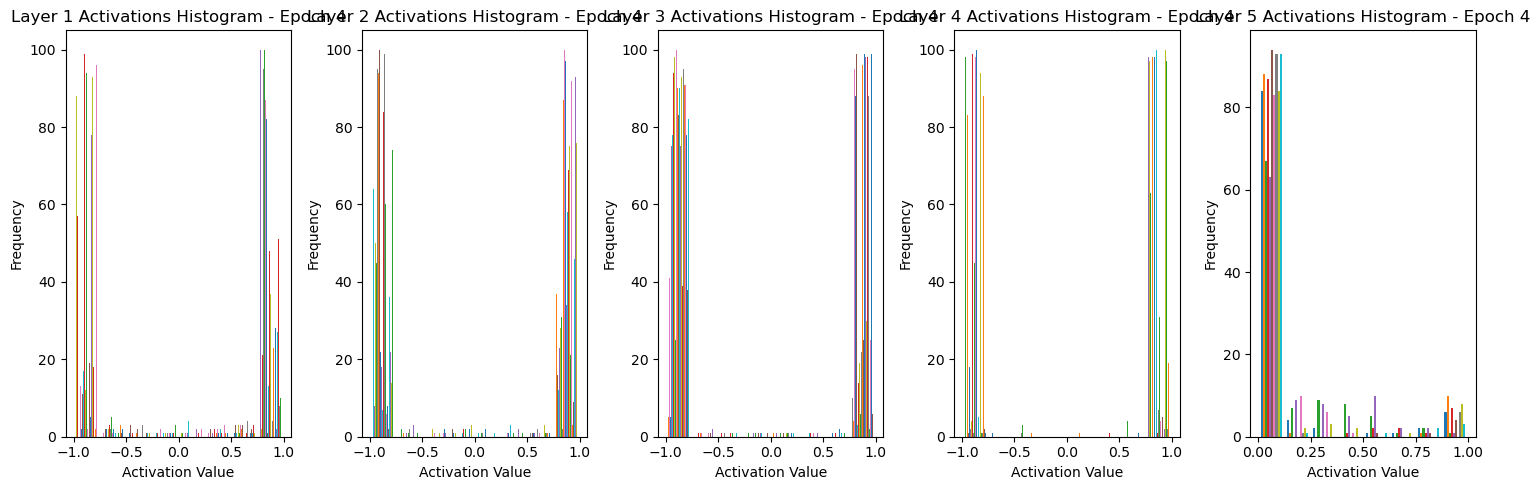

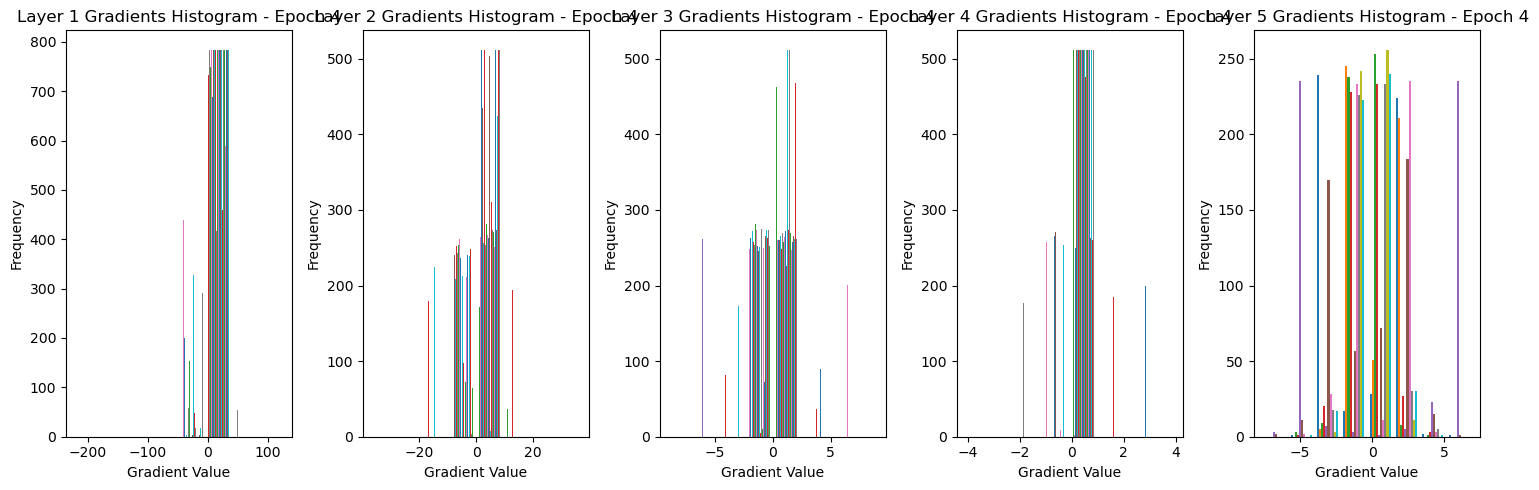

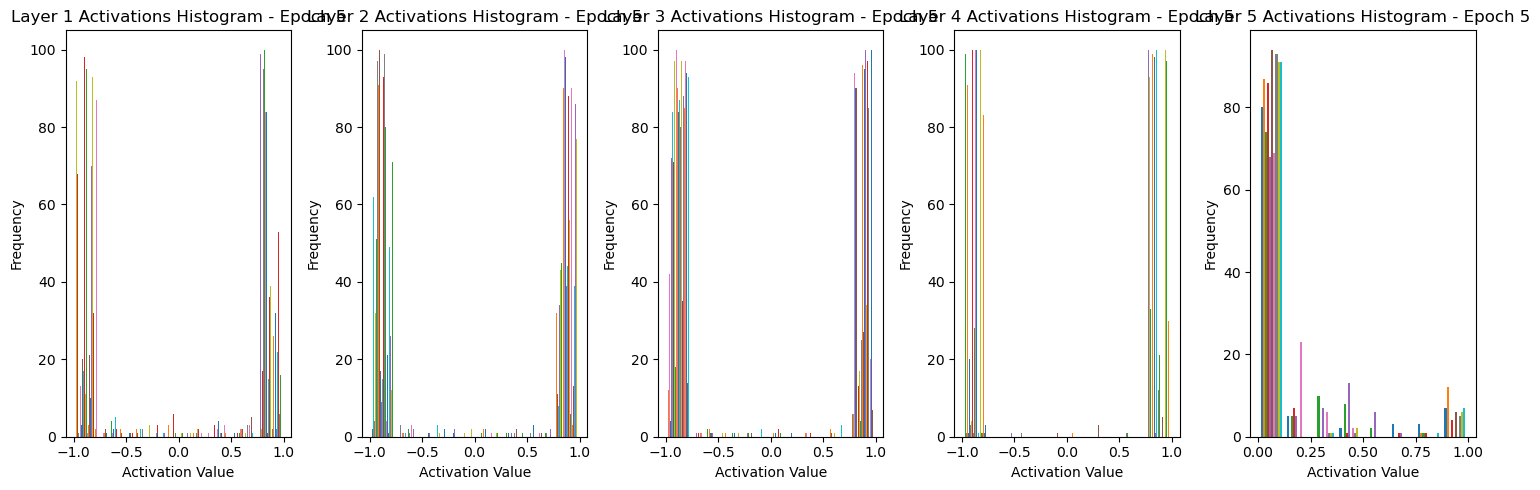

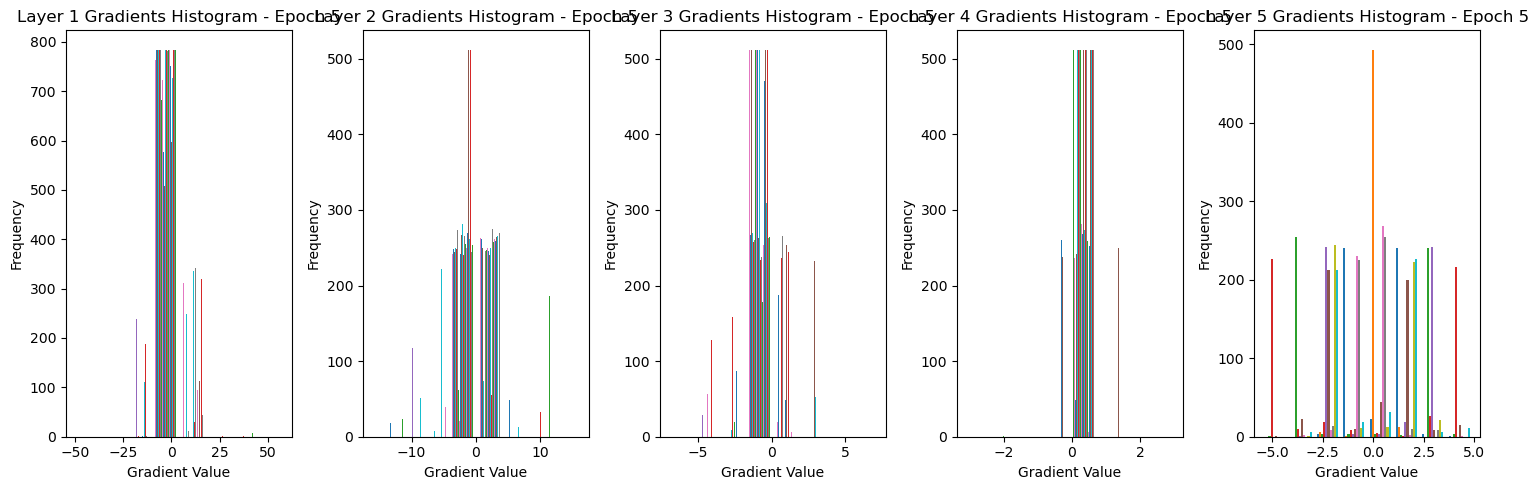

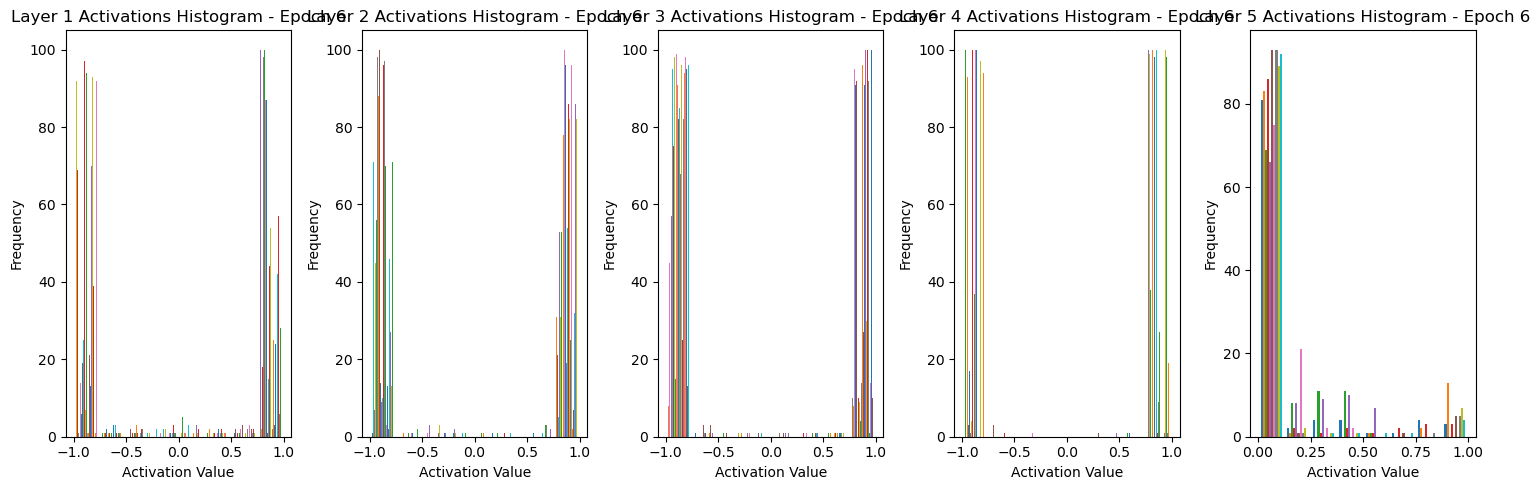

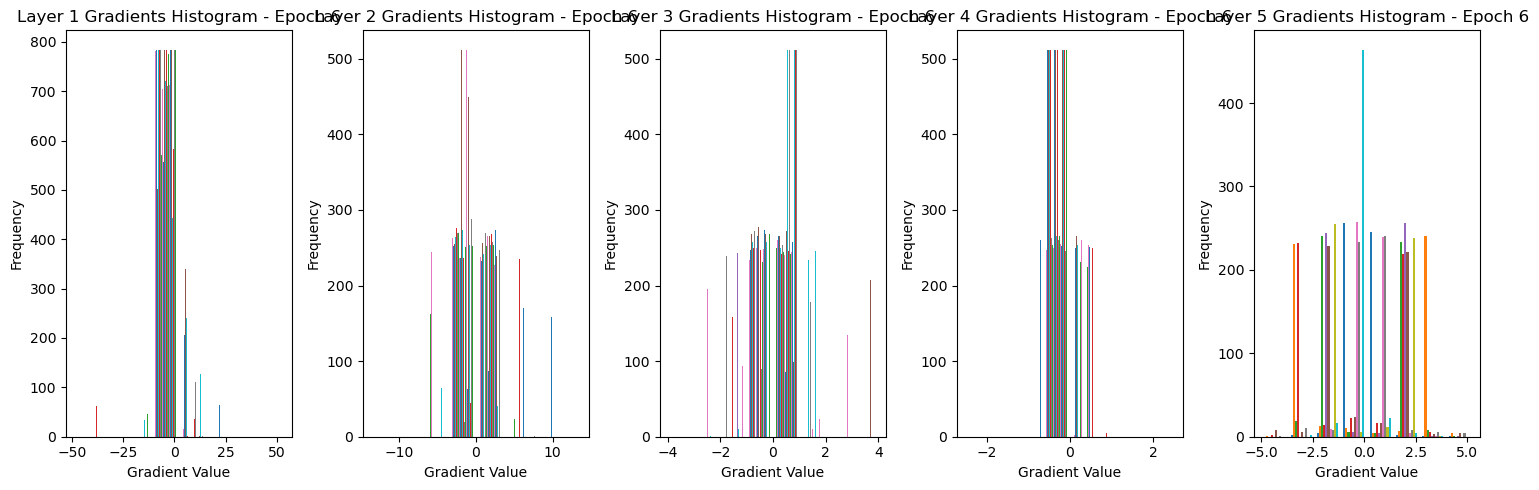

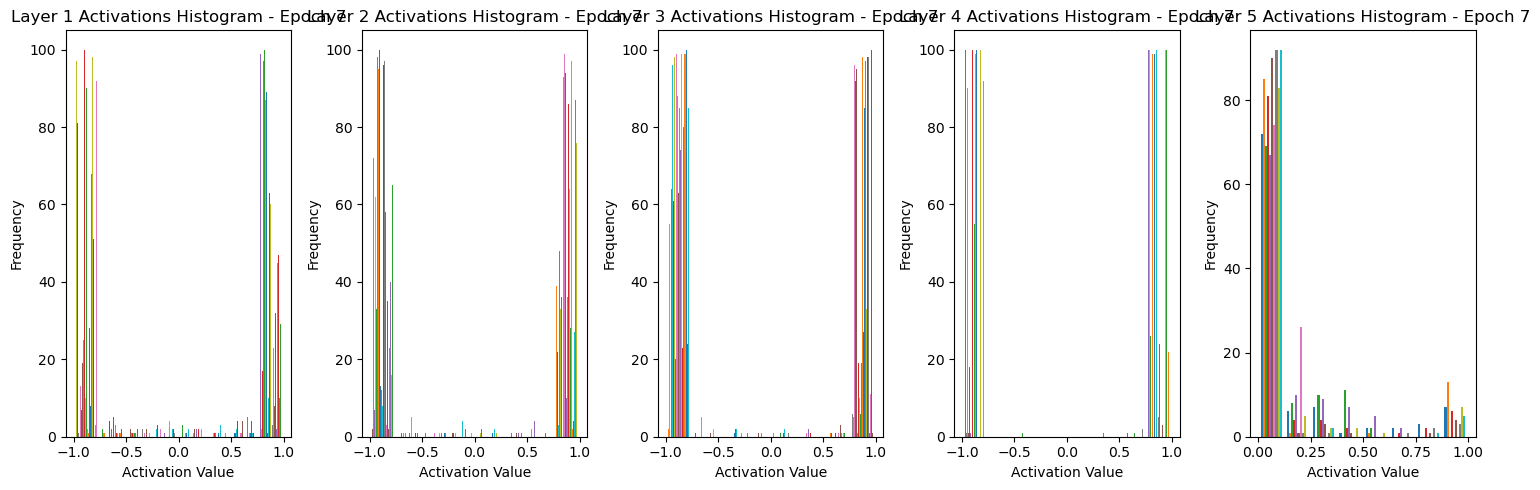

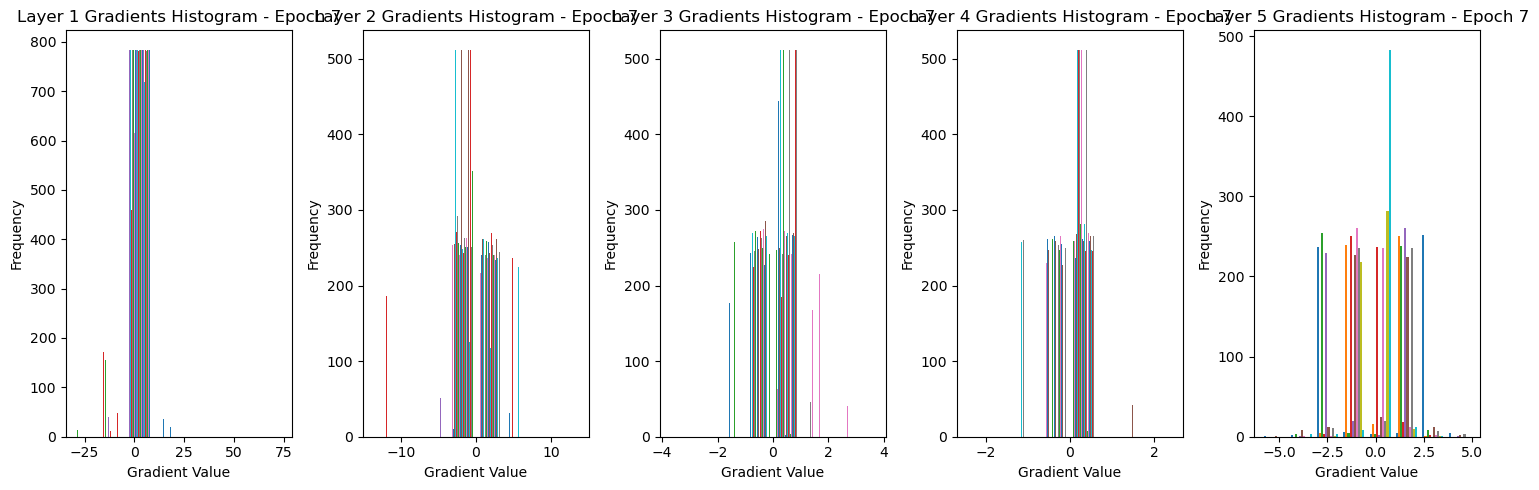

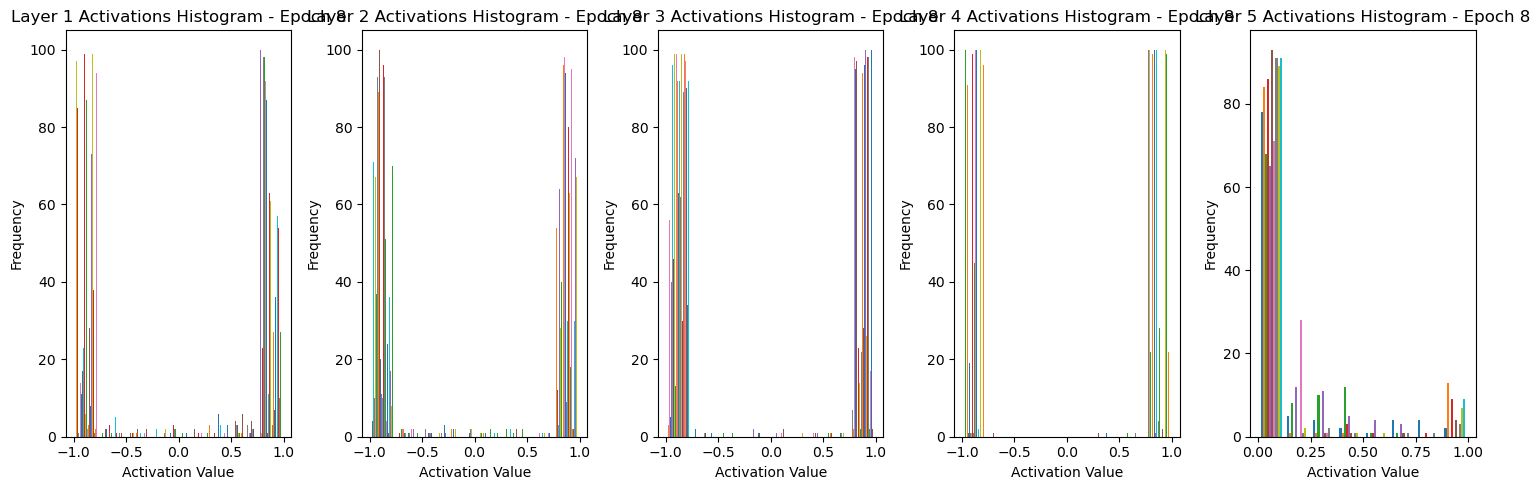

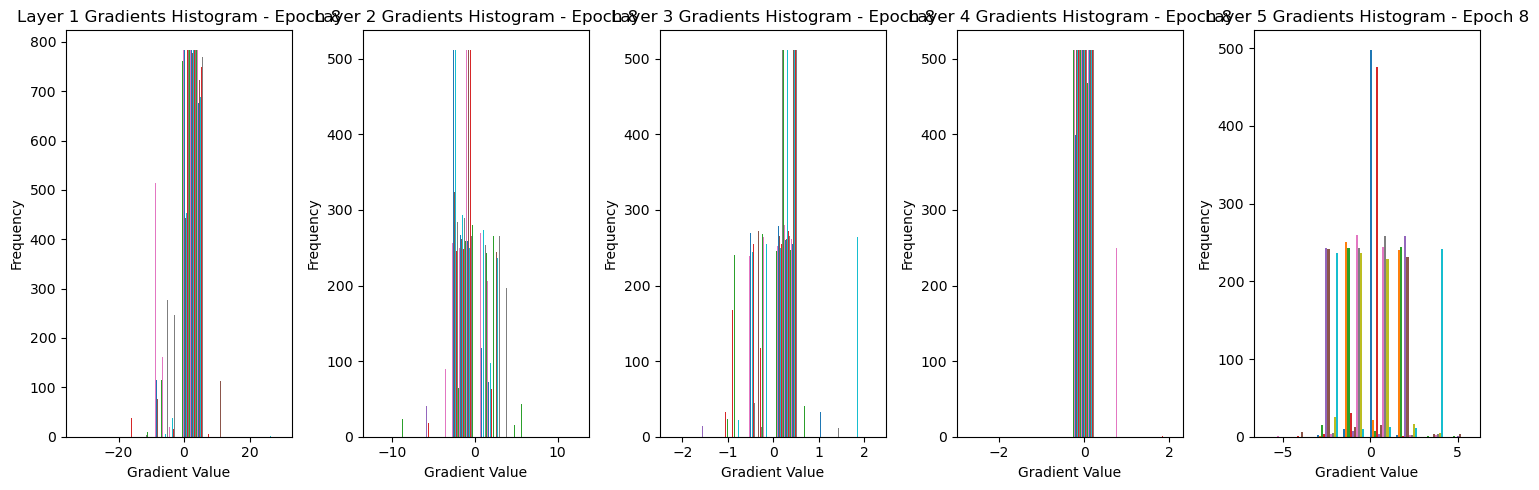

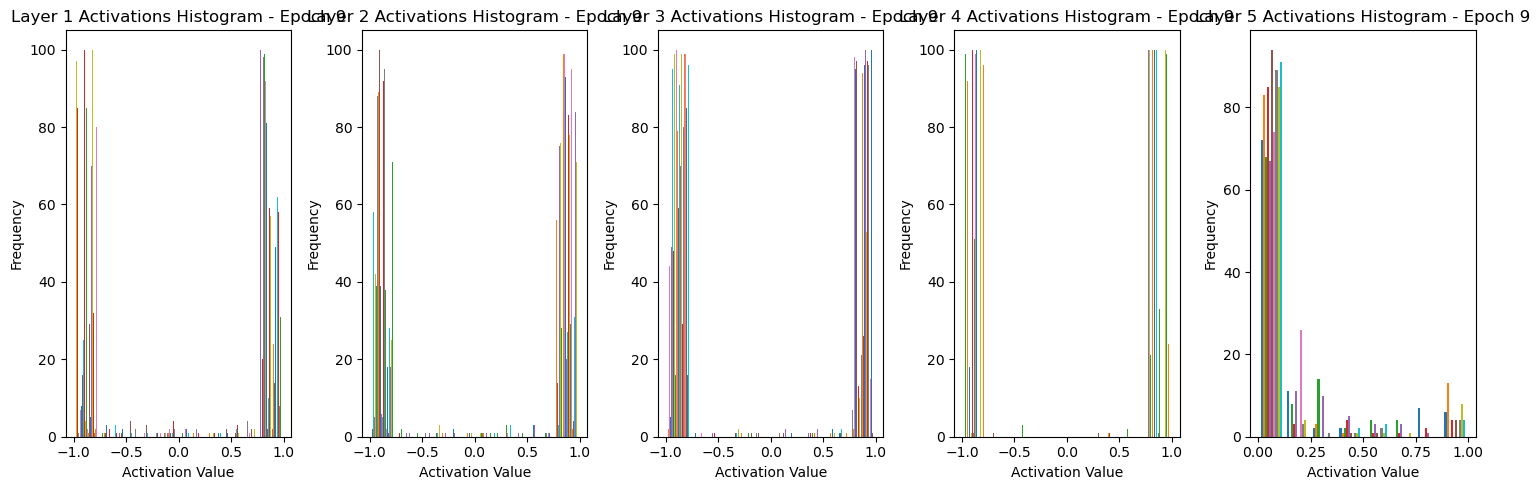

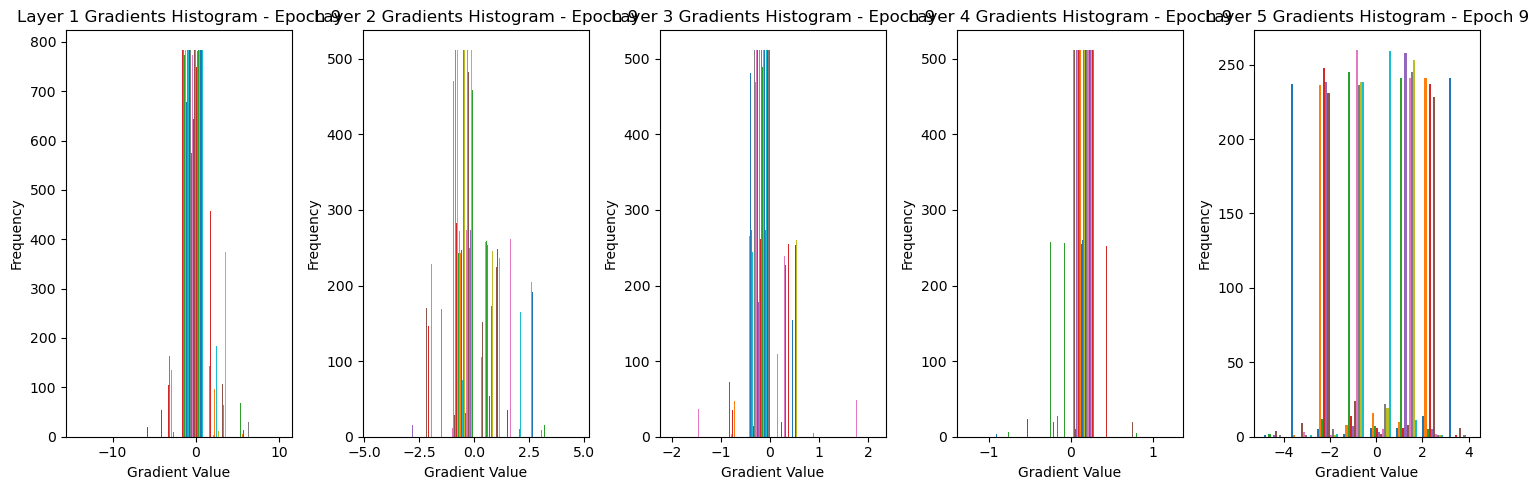

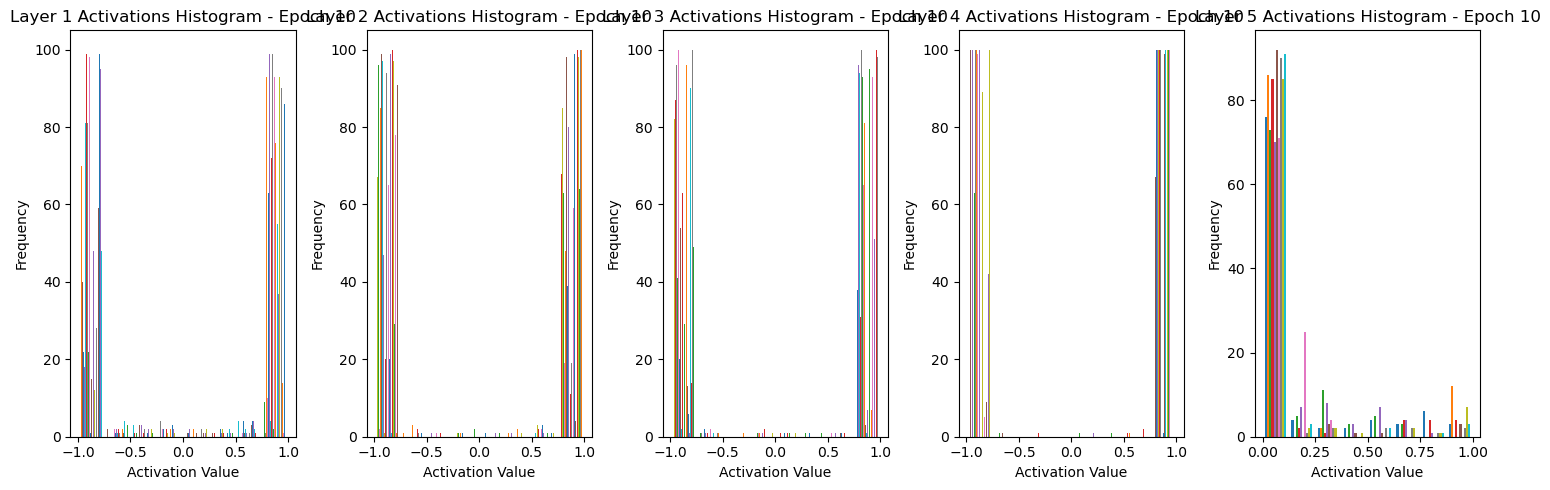

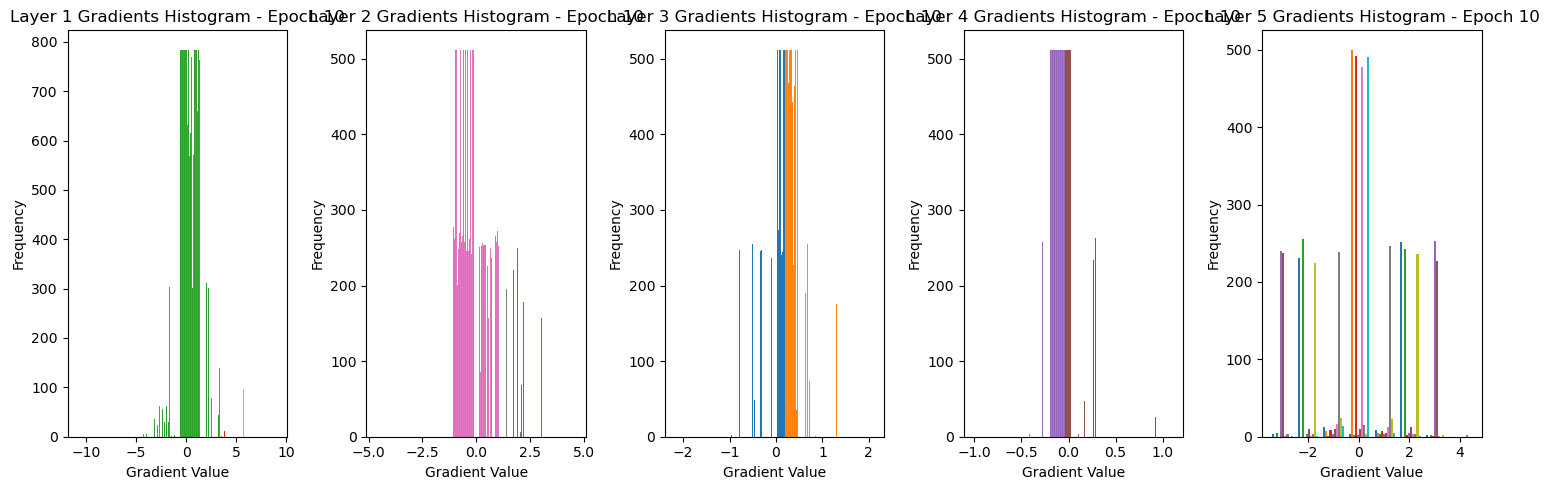

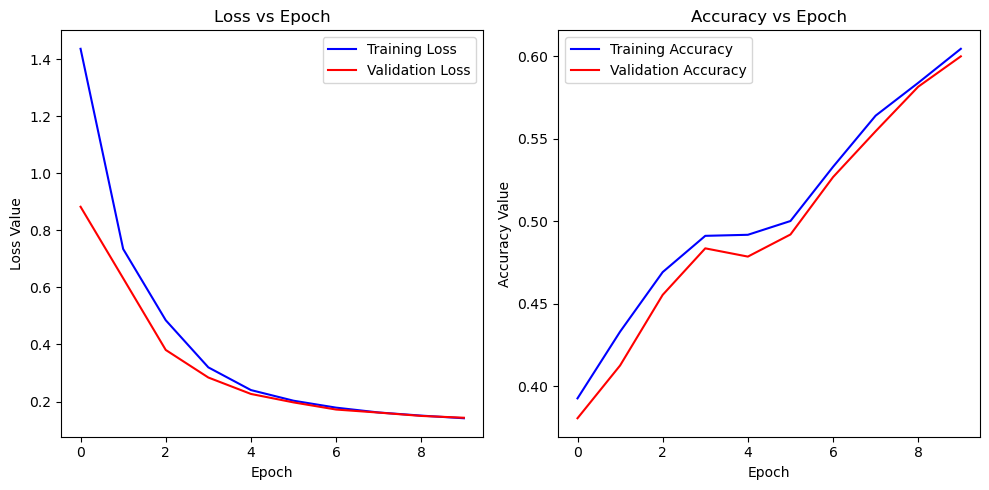

In [21]:
from nnlib.initialization_functions.normal import Normal
from nnlib.activation_functions.tanh import Tanh

model = SequentialModel()


model.add(Dense(n_units= 512, input_dim=784, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units= 512, input_dim=512, activation=Tanh()))
model.add(Dense(n_units = 10, input_dim = 512, activation=Sigmoid()))

model.compile(optimizer=AdaptiveMomentEstimation(0.001),
              loss=BinaryCrossEntropy(),
              initializer=Normal(mean = 0, std =1))

model.fit(X_train, y_train_onehot, epochs=10, batch_size=100, X_val=X_test, y_val=y_test, verbose=True)
